<a href="https://colab.research.google.com/github/ngurah909/Deepfake-Detection-FSOF/blob/main/Deepfake_Detection_Tugas_Akhir(v1.0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Deepfake Tugas Akhir

## Setup Notebook

### Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library

In [ ]:
import os
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dlib
import os, json
import numpy as np
from tqdm import tqdm
import h5py
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
!pip install mtcnn face-alignment h5py tqdm
import datetime # <--- Import eksplisit agar aman

import os
import cv2
import numpy as np
import h5py
import json
import re
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from mtcnn import MTCNN
import face_alignment
import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.2 MB/s eta 0:00:00


### Load Assets

In [ ]:
import os
import shutil
import torch
import face_alignment

# Lokasi cache dan Google Drive
cache_dir = os.path.expanduser("~/.cache/torch/hub/checkpoints")
drive_model_dir = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/face_alignment"

os.makedirs(cache_dir, exist_ok=True)
os.makedirs(drive_model_dir, exist_ok=True)

print("📁 Cache dir:", cache_dir)
print("📁 Drive model dir:", drive_model_dir)

# Nama file model terbaru (berdasarkan hasil scan)
required_files = [
    "2DFAN4-cd938726ad.zip",   # Landmark model (ZIP)
    "s3fd-619a316812.pth"      # Face detector
]

# Cek apakah semua model ada di Drive
all_exist_in_drive = all([
    os.path.exists(os.path.join(drive_model_dir, f))
    for f in required_files
])

if all_exist_in_drive:
    print("✅ Semua model FAN ditemukan di Google Drive. Menyalin kembali ke cache...")
    for f in required_files:
        shutil.copy(
            os.path.join(drive_model_dir, f),
            os.path.join(cache_dir, f)
        )
else:
    print("⚠️ Model belum ada di Drive. FAN akan download otomatis saat load...")
    print("⏳ Loading FAN...")

# Load FAN (jika file belum ada, face-alignment akan download sendiri)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
fa = face_alignment.FaceAlignment(
    face_alignment.LandmarksType.TWO_D,
    flip_input=False,
    device=device
)

print("✅ FAN Loaded.")

# Jika belum ada → copy ke Google Drive
if not all_exist_in_drive:
    print("💾 Menyimpan model FAN ke Google Drive...")
    for f in required_files:
        src = os.path.join(cache_dir, f)
        dst = os.path.join(drive_model_dir, f)
        if os.path.exists(src):
            shutil.copy(src, dst)
            print(f"✔ Copied {f}")
        else:
            print(f"❌ Tidak ditemukan: {src}")

📁 Cache dir: /root/.cache/torch/hub/checkpoints
📁 Drive model dir: /content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/face_alignment
✅ Semua model FAN ditemukan di Google Drive. Menyalin kembali ke cache...
✅ FAN Loaded.


In [ ]:
import os
import shutil
import torch
import face_alignment
from google.colab import drive

print("🔄 MEMULAI PROSES INISIALISASI MODEL...")

# 1. Pastikan Google Drive Ter-Mount
if not os.path.exists('/content/drive'):
    print("📂 Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("✅ Google Drive sudah terpasang.")

# 2. Konfigurasi Path (Sesuaikan dengan folder Anda)
CACHE_DIR = os.path.expanduser("~/.cache/torch/hub/checkpoints")
DRIVE_MODEL_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/face_alignment"

# File yang wajib ada
REQUIRED_FILES = [
    "2DFAN4-cd938726ad.zip",  # Model Landmark
    "s3fd-619a316812.pth"     # Model Deteksi Wajah
]

# 3. Cek & Perbaiki Cache
if not os.path.exists(CACHE_DIR):
    os.makedirs(CACHE_DIR)

print(f"🔍 Memeriksa file model di: {DRIVE_MODEL_DIR}")
files_ready = True

for fname in REQUIRED_FILES:
    src_path = os.path.join(DRIVE_MODEL_DIR, fname)
    dst_path = os.path.join(CACHE_DIR, fname)

    # Cek apakah file ada di Drive
    if not os.path.exists(src_path):
        print(f"❌ MISSING di Drive: {fname}")
        print("   Mohon upload file tersebut ke folder Assets/face_alignment Anda.")
        files_ready = False
    else:
        # Cek apakah file sudah ada di Cache sistem (untuk face_alignment)
        if not os.path.exists(dst_path):
            print(f"📥 Menyalin ke cache sistem: {fname}...")
            shutil.copy(src_path, dst_path)
        else:
            print(f"✅ File OK (Cache): {fname}")

# 4. Load Model (Hanya jika file lengkap)
if files_ready:
    print("\n⏳ Sedang memuat model Face Alignment ke GPU/CPU...")
    try:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        # Inisialisasi variabel global 'fa'
        fa = face_alignment.FaceAlignment(
            face_alignment.LandmarksType.TWO_D,
            flip_input=False,
            device=device
        )
        print(f"🎉 SUKSES! Model dimuat di: {device.upper()}")
        print("Sekarang Anda bisa menjalankan script testing/validity.")

    except Exception as e:
        print(f"⛔ GAGAL MEMUAT MODEL: {e}")
        print("Coba restart runtime (Runtime > Restart Session) lalu jalankan cell ini lagi.")
else:
    print("\n⛔ GAGAL: File model tidak lengkap di Google Drive.")

🔄 MEMULAI PROSES INISIALISASI MODEL...
✅ Google Drive sudah terpasang.
🔍 Memeriksa file model di: /content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/face_alignment
✅ File OK (Cache): 2DFAN4-cd938726ad.zip
✅ File OK (Cache): s3fd-619a316812.pth

⏳ Sedang memuat model Face Alignment ke GPU/CPU...
🎉 SUKSES! Model dimuat di: CUDA
Sekarang Anda bisa menjalankan script testing/validity.


### Load Data

#### Load Raw Dataset

In [ ]:
Celeb_real_dataset = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/DATASET/Celeb-real'
Celeb_synthesis_dataset = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/DATASET/Celeb-synthesis'
YouTube_real_dataset = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/DATASET/YouTube-real'

folders = [Celeb_real_dataset, Celeb_synthesis_dataset, YouTube_real_dataset]

def count_files_in_folder(folder_path):
    file_count = 0
    if not os.path.exists(folder_path):
        print(f"⚠️ Peringatan: Path tidak ditemukan - {folder_path}")
        return 0

    for _, _, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

print("📊 Ringkasan jumlah file:\n")

total_files = 0
for folder in folders:
    # 2. Pastikan os.path.basename dipanggil
    folder_name = os.path.basename(folder)
    count = count_files_in_folder(folder)
    total_files += count
    print(f"📁 {folder_name}: {count} files")

print(f"\n📦 Total file di semua folder: {total_files}")

📊 Ringkasan jumlah file:

📁 Celeb-real: 590 files
📁 Celeb-synthesis: 5639 files
📁 YouTube-real: 300 files

📦 Total file di semua folder: 6529


#### Load Facial Landmark Coordinat Dataset

#### Load Facial Sparse Optical Flow(FSOF) Data

## Exploratory Data Analysis (EDA)

### Metadata Extraction

In [ ]:
# Path ke file CSV di Google Drive
drive_csv_path = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/video_metadata.csv'

# Path dataset setelah unzip
extract_path = '/content'
target_dirs = ['Celeb-real', 'Celeb-synthesis', 'YouTube-real']

# === CEK apakah metadata CSV sudah ada ===
if os.path.exists(drive_csv_path):
    print(f"📂 File metadata ditemukan di Drive:\n{drive_csv_path}")
    df = pd.read_csv(drive_csv_path)
    print(f"✅ Metadata loaded successfully — {len(df)} entries\n")
else:
    print("⚙️ File metadata belum ada — melakukan ekstraksi metadata video...\n")

    video_files = []
    for folder in target_dirs:
        folder_path = os.path.join(extract_path, folder)
        if os.path.exists(folder_path):
            for root, _, files in os.walk(folder_path):
                for f in files:
                    if f.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                        video_files.append(os.path.join(root, f))
        else:
            print(f"⚠️ Folder tidak ditemukan: {folder_path}")

    print(f"🎞️ Total video ditemukan: {len(video_files)}\n")

    def extract_metadata(path):
        try:
            cap = cv2.VideoCapture(path)
            if not cap.isOpened():
                return None
            fps = cap.get(cv2.CAP_PROP_FPS)
            frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            duration = frames / fps if fps > 0 else 0
            width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
            cap.release()
            label = (
                'Celeb-real' if 'Celeb-real' in path else
                'Celeb-synthesis' if 'Celeb-synthesis' in path else
                'YouTube-real' if 'YouTube-real' in path else 'Unknown'
            )
            return [path, label, fps, frames, duration, int(width), int(height)]
        except:
            return None

    # Gunakan multiprocessing untuk mempercepat
    num_workers = max(1, cpu_count() - 1)
    with Pool(processes=num_workers) as pool:
        results = list(tqdm(pool.imap(extract_metadata, video_files), total=len(video_files), desc="Extracting metadata"))

    # Buang hasil None
    results = [r for r in results if r is not None]

    # Simpan ke DataFrame
    df = pd.DataFrame(results, columns=['path', 'label', 'fps', 'frames', 'duration', 'width', 'height'])
    df['resolution'] = df['width'].astype(str) + 'x' + df['height'].astype(str)

    # Simpan ke Google Drive
    os.makedirs(os.path.dirname(drive_csv_path), exist_ok=True)
    df.to_csv(drive_csv_path, index=False)
    print(f"✅ Metadata saved to: {drive_csv_path}\n")

# Cek hasil akhir
print("📊 DataFrame Summary:")
print(df.head())
print(f"\nTotal entries: {len(df)}")


📂 File metadata ditemukan di Drive:
/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/video_metadata.csv
✅ Metadata loaded successfully — 6529 entries

📊 DataFrame Summary:
                                path       label        fps  frames  \
0  /content/Celeb-real/id55_0002.mp4  Celeb-real  30.000000   418.0   
1  /content/Celeb-real/id35_0002.mp4  Celeb-real  30.000000   380.0   
2  /content/Celeb-real/id51_0004.mp4  Celeb-real  29.000008   447.0   
3  /content/Celeb-real/id36_0007.mp4  Celeb-real  30.000000   482.0   
4  /content/Celeb-real/id51_0005.mp4  Celeb-real  30.000000   383.0   

    duration  width  height resolution  
0  13.933333    856     478    856x478  
1  12.666667    848     466    848x466  
2  15.413789    856     478    856x478  
3  16.066667    848     466    848x466  
4  12.766667    856     478    856x478  

Total entries: 6529


### Dataset Overview

In [ ]:
print("\n📊 Dataset Summary")
print(f"Total videos: {len(df)}")
print(f"Total duration: {df['duration'].sum()/3600:.2f} hours")
print(f"Average duration per video: {df['duration'].mean():.2f} seconds")
print(f"Average FPS: {df['fps'].mean():.2f}")
print(f"Common Resolutions:\n{df['resolution'].value_counts().head(5)}")


📊 Dataset Summary
Total videos: 6529
Total duration: 22.93 hours
Average duration per video: 12.64 seconds
Average FPS: 29.99
Common Resolutions:
resolution
856x478    1251
944x500     604
850x472     520
848x466     475
848x472     239
Name: count, dtype: int64


### Distribution per Class (Real vs Fake)

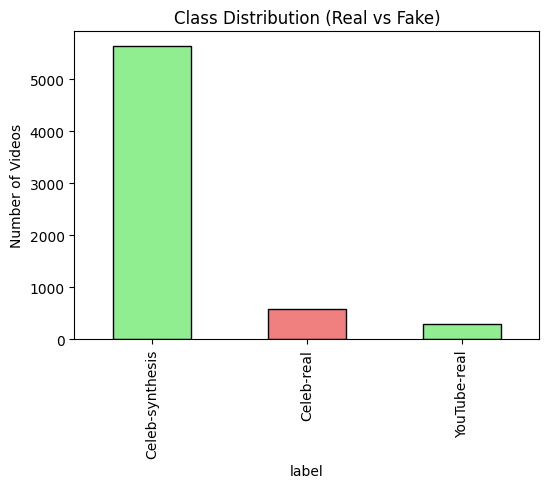

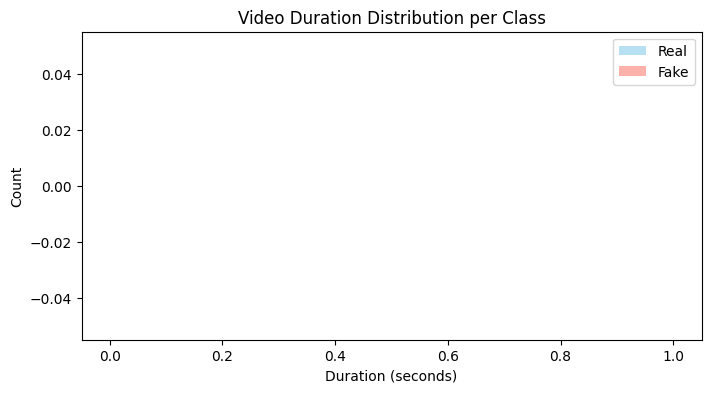

<Figure size 600x400 with 0 Axes>

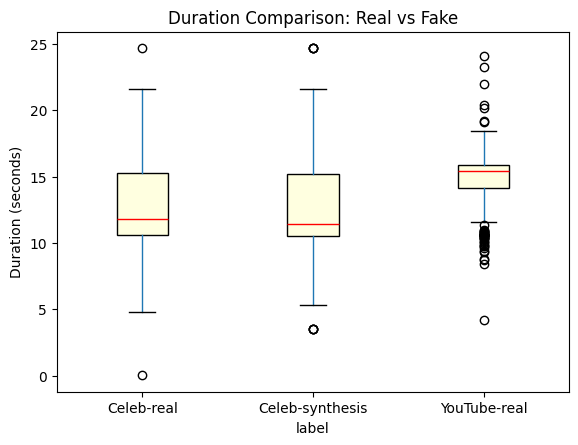

In [ ]:
import matplotlib.pyplot as plt

# Count per class
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['lightgreen','lightcoral'], edgecolor='black')
plt.title("Class Distribution (Real vs Fake)")
plt.ylabel("Number of Videos")
plt.show()

# Duration per class
plt.figure(figsize=(8,4))
plt.hist(df[df['label']=='Real']['duration'], bins=40, alpha=0.6, label='Real', color='skyblue')
plt.hist(df[df['label']=='Fake']['duration'], bins=40, alpha=0.6, label='Fake', color='salmon')
plt.legend()
plt.title("Video Duration Distribution per Class")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

# Boxplot perbandingan durasi
plt.figure(figsize=(6,4))
df.boxplot(column='duration', by='label', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightyellow', color='black'),
           medianprops=dict(color='red'))
plt.title("Duration Comparison: Real vs Fake")
plt.suptitle('')
plt.ylabel("Duration (seconds)")
plt.show()


### FPS Distribution Analysis

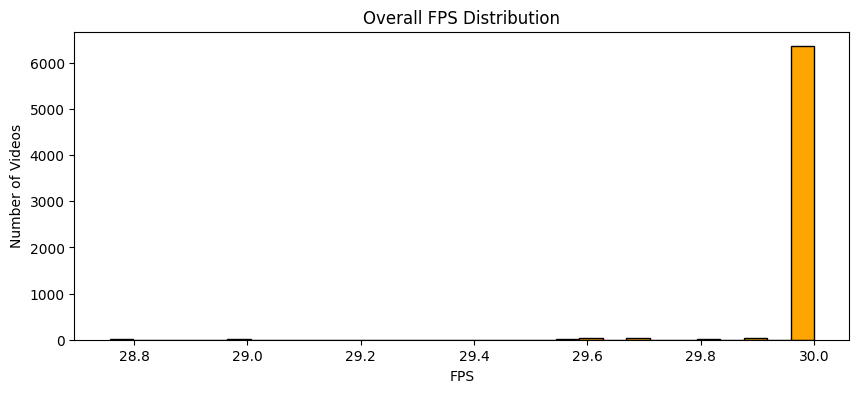

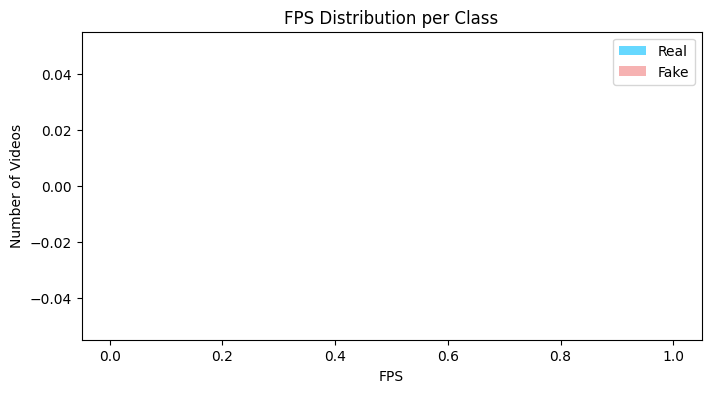

🎞️ FPS Statistics per Class:


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Celeb-real,590.0,29.985719,0.092344,28.756999,30.0,30.0,30.0,30.0
Celeb-synthesis,5639.0,29.989683,0.082696,28.756999,30.0,30.0,30.0,30.0
YouTube-real,300.0,29.998560,0.018900,29.700000,30.0,30.0,30.0,30.0


In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df['fps'], bins=30, color='orange', edgecolor='black')
plt.title("Overall FPS Distribution")
plt.xlabel("FPS")
plt.ylabel("Number of Videos")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(df[df['label']=='Real']['fps'], bins=30, alpha=0.6, label='Real', color='deepskyblue')
plt.hist(df[df['label']=='Fake']['fps'], bins=30, alpha=0.6, label='Fake', color='lightcoral')
plt.legend()
plt.title("FPS Distribution per Class")
plt.xlabel("FPS")
plt.ylabel("Number of Videos")
plt.show()

print("🎞️ FPS Statistics per Class:")
display(df.groupby('label')['fps'].describe())


### Resolution Distribution


📏 Top 5 Resolutions - Real:
Series([], Name: count, dtype: int64)

📏 Top 5 Resolutions - Fake:
Series([], Name: count, dtype: int64)


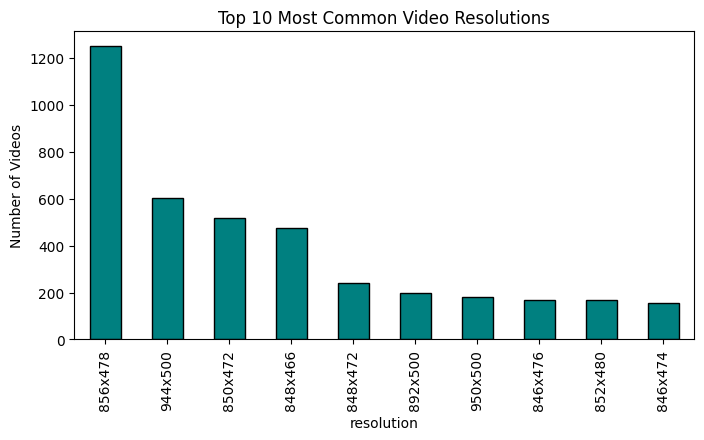

In [ ]:
print("\n📏 Top 5 Resolutions - Real:")
print(df[df['label']=='Real']['resolution'].value_counts().head(5))

print("\n📏 Top 5 Resolutions - Fake:")
print(df[df['label']=='Fake']['resolution'].value_counts().head(5))

plt.figure(figsize=(8,4))
df['resolution'].value_counts().head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Most Common Video Resolutions")
plt.ylabel("Number of Videos")
plt.show()

### FPS vs Duration Relationship

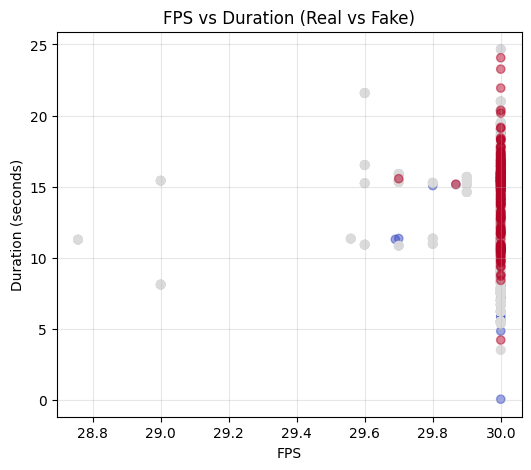

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['fps'], df['duration'], alpha=0.5, c=pd.factorize(df['label'])[0], cmap='coolwarm')
plt.title("FPS vs Duration (Real vs Fake)")
plt.xlabel("FPS")
plt.ylabel("Duration (seconds)")
plt.grid(alpha=0.3)
plt.show()

### FPS Group Distribution (<30, =30, >30)

📊 FPS Group Distribution per Class:


fps_group,<30,=30
label,,
Celeb-real,23,567
Celeb-synthesis,147,5492
YouTube-real,2,298


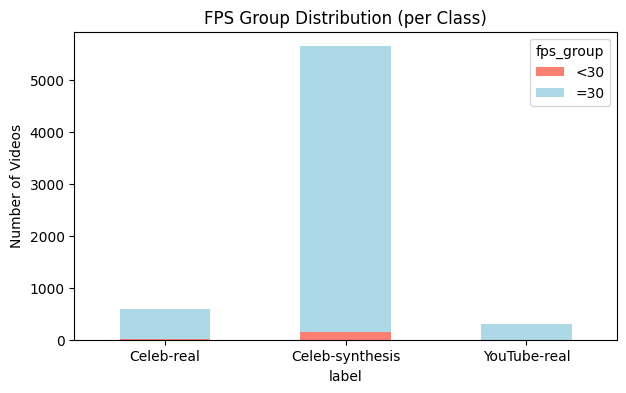

In [ ]:
df['fps_group'] = df['fps'].apply(lambda x: '<30' if x < 30 else '=30' if x == 30 else '>30')

fps_summary = df.groupby(['label', 'fps_group']).size().unstack(fill_value=0)
print("📊 FPS Group Distribution per Class:")
display(fps_summary)

fps_summary.plot(kind='bar', stacked=True, figsize=(7,4), color=['salmon','lightblue','lightgreen'])
plt.title("FPS Group Distribution (per Class)")
plt.ylabel("Number of Videos")
plt.xticks(rotation=0)
plt.show()

## Preprocessing

### Facial Landmark Detection

In [ ]:
def extract_landmarks_single(frame, fa_model):
    """
    1. Detect face using FAN's built-in S3FD detector to get BBox & Confidence.
    2. Extract landmarks using that BBox.
    """
    if frame is None:
        return [0,0,0,0], np.zeros((68, 2), dtype=np.float32), 0.0

    # FAN/S3FD expects RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 1. Detect Faces manually to get the Confidence Score
    # Returns list of [x1, y1, x2, y2, score]
    try:
        preds = fa_model.face_detector.detect_from_image(frame_rgb)
    except Exception as e:
        return [0,0,0,0], np.zeros((68, 2), dtype=np.float32), 0.0

    if preds is None or len(preds) == 0:
        return [0,0,0,0], np.zeros((68, 2), dtype=np.float32), 0.0

    # 2. Select the Largest Face (to be consistent)
    best_bbox = None
    best_conf = 0.0
    max_area = 0

    for pred in preds:
        # S3FD returns [x1, y1, x2, y2, score]
        x1, y1, x2, y2, score = pred
        area = (x2 - x1) * (y2 - y1)

        if area > max_area:
            max_area = area
            best_bbox = [x1, y1, x2, y2]
            best_conf = score

    # 3. Get Landmarks
    # We pass the best_bbox to avoid re-detecting
    # Note: FAN expects 'detected_faces' as list of [x1, y1, x2, y2] (without score)
    try:
        landmarks_set = fa_model.get_landmarks_from_image(frame_rgb, detected_faces=[best_bbox])
    except Exception as e:
        landmarks_set = None

    if landmarks_set is None or len(landmarks_set) == 0:
        return best_bbox, np.zeros((68, 2), dtype=np.float32), float(best_conf)

    pts = np.array(landmarks_set[0], dtype=np.float32)
    return best_bbox, pts, float(best_conf)

### Facial Landmark Smoothing

In [ ]:
def smooth_landmarks(landmarks_sequence, window_size=5):
    if len(landmarks_sequence) < window_size:
        return landmarks_sequence

    smoothed = np.copy(landmarks_sequence)
    for i in range(68):
        for j in range(2):
            series = landmarks_sequence[:, i, j]
            kernel = np.ones(window_size) / window_size
            smoothed[:, i, j] = np.convolve(series, kernel, mode='same')

            # Simple boundary handling
            smoothed[:window_size, i, j] = series[:window_size]
            smoothed[-window_size:, i, j] = series[-window_size:]

    return smoothed

### Pipeline Video Preprocessing

#### Split to batches

In [ ]:
def save_json(obj, path):
    with open(path, "w") as f:
        json.dump(obj, f, indent=2)
    print(f"💾 Saved: {path}")

def load_json(path):
    with open(path, "r") as f:
        return json.load(f)

def split_into_batches(items, n_batches):
    batch_size = max(1, len(items) // n_batches)
    batches = [items[i:i + batch_size] for i in range(0, len(items), batch_size)]
    while len(batches) < n_batches:
        batches.append([])
    return batches[:n_batches]

BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
VIDEO_LIST_PATH = os.path.join(BASE_PATH, "video_list.json")
BATCH_LIST_PATH = os.path.join(BASE_PATH, "video_batches.json")

# --- Step 1: Scan Videos ---
if os.path.exists(VIDEO_LIST_PATH):
    print("📌 Loading existing video list...")
    video_files = load_json(VIDEO_LIST_PATH)
else:
    print("📌 Scanning directories...")
    video_files = []
    target_dirs = [Celeb_real_dataset, Celeb_synthesis_dataset] # Menggunakan variabel path

    for folder in target_dirs:
        if os.path.exists(folder):
            for root, _, files in os.walk(folder):
                for f in files:
                    if f.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                        video_files.append(os.path.join(root, f))
        else:
            print(f"⚠️ Folder not found: {folder}")

    save_json(video_files, VIDEO_LIST_PATH)

print(f"🎬 Total videos: {len(video_files)}")

# --- Step 2: Create Batches ---
if os.path.exists(BATCH_LIST_PATH):
    print("📌 Loading existing batch split...")
    batches = load_json(BATCH_LIST_PATH)
else:
    print("📌 Creating new batch split (100 batches)...")
    batches = split_into_batches(video_files, n_batches=100)
    save_json(batches, BATCH_LIST_PATH)

📌 Loading existing video list...
🎬 Total videos: 6229
📌 Loading existing batch split...


#### HDF5 file Configuration

```
└── id01_0001/
    ├── frames (12345)               
    │   ├── frame_0001                     
    │   │       ├── bbox → [x1, y1, x2, y2]
    │   │       ├── facial_landmarks → (68, 2)
    │   │       └── face_confidence → float (0–1)
    │   ├── frame_0002
    │   │       ├── bbox → [x1, y1, x2, y2]
    │   │       ├── facial_landmarks → (68, 2)
    │   │       └── face_confidence → float
    │   ├── frame_0003
    │   │       ├── bbox → [x1, y1, x2, y2]
    │   │       ├── facial_landmarks → (68, 2)
    │   │       └── face_confidence → float
    │   └── ...
    └── metadata/
        ├── fps
        ├── frame_count
        ├── resolution
        ├── original_path
        ├── label → "real" / "fake"
        └── created_at → timestamp

 ```

In [ ]:
import h5py
import numpy as np
import time

def save_batch_to_hdf5(hdf5_path, batch_results):

    with h5py.File(hdf5_path, "w") as h5f:

        for video_id, data in batch_results.items():

            print(f"📁 Writing video: {video_id}")

            # Root group = video folder
            video_grp = h5f.create_group(video_id)

            # ================================
            #  METADATA
            # ================================
            meta = data["metadata"]
            meta_grp = video_grp.create_group("metadata")

            meta_grp.create_dataset("fps", data=meta["fps"])
            meta_grp.create_dataset("frame_count", data=meta["frame_count"])
            meta_grp.create_dataset("resolution", data=np.array(meta["resolution"], dtype="int"))
            meta_grp.create_dataset("original_path", data=np.string_(meta["original_path"]))
            meta_grp.create_dataset("label", data=np.string_(meta["label"]))
            meta_grp.create_dataset("created_at", data=np.string_(meta["created_at"]))

            # ================================
            #  FRAMES
            # ================================
            frames_grp = video_grp.create_group("frames")

            bboxes      = data["bboxes"]
            landmarks   = data["landmarks"]
            confidences = data["confidences"]

            for i in range(len(bboxes)):
                frame_grp = frames_grp.create_group(f"frame_{i+1:04d}")

                frame_grp.create_dataset("bbox",
                    data=np.array(bboxes[i], dtype="float32")
                )

                frame_grp.create_dataset("facial_landmarks",
                    data=np.array(landmarks[i], dtype="float32")
                )

                frame_grp.create_dataset("face_confidence",
                    data=float(confidences[i])
                )

    print(f"✅ Saved batch file: {hdf5_path}")

#### Process Single Video

In [ ]:
import cv2
import numpy as np
import os
import shutil
import datetime

def process_single_video(h5f, video_id, source_path, fa_model, label="real", target_fps=30):
    # -------------------------------------------
    # 1. I/O SETUP
    # -------------------------------------------
    temp_dir = "/content/fast_temp_processor_v2"
    os.makedirs(temp_dir, exist_ok=True)
    filename = os.path.basename(source_path)
    local_path = os.path.join(temp_dir, filename)

    try:
        shutil.copy(source_path, local_path)
    except:
        return # Skip if copy fails

    cap = cv2.VideoCapture(local_path)
    if not cap.isOpened():
        if os.path.exists(local_path): os.remove(local_path)
        return

    # Metadata
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # FPS Normalization Step
    frame_step = int(round(original_fps / target_fps)) if original_fps > target_fps else 1
    saved_fps = original_fps / frame_step

    # -------------------------------------------
    # 2. STRATEGI BARU: NO DOWNSCALE & BUFFER FIX
    # -------------------------------------------
    # PERBAIKAN 1: Hapus logic scale factor. Selalu 1.0 agar RMSE rendah (Akurat).
    SCALE_FACTOR = 1.0

    # Buffer Storage
    temp_data = {"landmarks": [], "bboxes": [], "confs": []}

    BATCH_SIZE = 128 # Kurangi batch size sedikit karena sekarang Full Res (agar VRAM aman)
    frames_buffer = []

    frame_idx = 0

    # --- HELPER FUNCTION UNTUK MEMPROSES BUFFER ---
    def process_buffer(buffer_frames):
        if not buffer_frames: return

        # Batch inference input
        # Karena Scale 1.0, langsung convert ke RGB
        batch_input = [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in buffer_frames]

        # A. Deteksi Wajah (Batch S3FD)
        try:
            # detect_from_batch lebih efisien jika model mendukung,
            # tapi detect_from_image loop manual lebih stabil untuk error handling per frame
            # Kita gunakan loop per frame di dalam buffer untuk safety memori
            batch_preds = []
            for img in batch_input:
                p = fa_model.face_detector.detect_from_image(img)
                batch_preds.append(p)
        except:
            batch_preds = [None] * len(buffer_frames)

        # B. Landmark Extraction
        for i, preds in enumerate(batch_preds):
            best_bbox = [0, 0, 0, 0]
            pts = np.zeros((68, 2), dtype=np.float32)
            conf = 0.0

            if preds is not None and len(preds) > 0:
                # Ambil wajah terbesar
                areas = [(p[2]-p[0])*(p[3]-p[1]) for p in preds]
                best_idx = np.argmax(areas)
                x1, y1, x2, y2, score = preds[best_idx]

                best_bbox = [x1, y1, x2, y2]
                conf = score

                # Get Landmarks
                try:
                    lms = fa_model.get_landmarks_from_image(batch_input[i], detected_faces=[best_bbox])
                    if lms:
                        pts = lms[0]
                except:
                    pass

            temp_data["landmarks"].append(pts)
            temp_data["bboxes"].append(best_bbox)
            temp_data["confs"].append(conf)

    # --- MAIN LOOP ---
    while True:
        ret, frame = cap.read()

        if not ret:
            # PERBAIKAN 2: JANGAN LANGSUNG BREAK TOTAL
            # Proses sisa buffer jika ada sebelum keluar loop
            if len(frames_buffer) > 0:
                process_buffer(frames_buffer)
            break

        if frame_idx % frame_step == 0:
            frames_buffer.append(frame)

        frame_idx += 1

        # Jika buffer penuh, proses
        if len(frames_buffer) >= BATCH_SIZE:
            process_buffer(frames_buffer)
            frames_buffer = [] # Kosongkan buffer

    cap.release()
    if os.path.exists(local_path): os.remove(local_path)

    # Cek jika tidak ada data wajah sama sekali
    if not temp_data["landmarks"]:
        return

    # --- 3. SAVING & SMOOTHING ---
    raw_array = np.array(temp_data["landmarks"])

    # Gunakan fungsi smooth_landmarks yang sudah Anda definisikan sebelumnya
    smoothed_lm_array = smooth_landmarks(raw_array, window_size=5)

    video_grp = h5f.create_group(video_id)

    meta = video_grp.create_group("metadata")
    meta.create_dataset("fps", data=saved_fps)
    meta.create_dataset("original_fps", data=original_fps)
    meta.create_dataset("frame_count", data=len(smoothed_lm_array))
    meta.create_dataset("resolution", data=[height, width])
    meta.create_dataset("original_path", data=str(source_path))
    meta.create_dataset("label", data=str(label))
    meta.create_dataset("created_at", data=str(datetime.datetime.now()))

    frames_grp = video_grp.create_group("frames")
    for i in range(len(smoothed_lm_array)):
        f_grp = frames_grp.create_group(f"frame_{i+1:04d}")
        f_grp.create_dataset("bbox", data=temp_data["bboxes"][i])
        f_grp.create_dataset("facial_landmarks", data=smoothed_lm_array[i])
        f_grp.create_dataset("face_confidence", data=float(temp_data["confs"][i]))

#### Process Batch

In [ ]:
def get_existing_batches(hdf5_dir):
    pattern = re.compile(r"batch_(\d+)\.h5")
    files = []
    if not os.path.exists(hdf5_dir): os.makedirs(hdf5_dir)
    for f in os.listdir(hdf5_dir):
        m = pattern.match(f)
        if m: files.append((int(m.group(1)), f))
    files.sort(key=lambda x: x[0])
    return files
# --- WRAPPER UNTUK BATCHES ---
def process_batches_final_speed(batch_json_path, hdf5_dir, fa_model):
    batches = load_json(batch_json_path)
    os.makedirs(hdf5_dir, exist_ok=True)

    # Temp folder untuk batch copy
    TEMP_BATCH_DIR = "/content/temp_batch_master"

    existing_batches = get_existing_batches(hdf5_dir)
    existing_numbers = [b[0] for b in existing_batches]

    for batch_idx, batch_videos in enumerate(batches, start=1):
        if batch_idx in existing_numbers:
            print(f"✅ Batch {batch_idx:03d} exists.")
            continue
        if not batch_videos: continue

        # 1. Bulk Copy (Saran 1)
        print(f"\n🚀 Batch {batch_idx:03d}: Copying to SSD...")
        if os.path.exists(TEMP_BATCH_DIR): shutil.rmtree(TEMP_BATCH_DIR)
        os.makedirs(TEMP_BATCH_DIR)

        local_map = {}
        for drive_path in tqdm(batch_videos, desc="📥 Copying"):
            if not os.path.exists(drive_path): continue
            fname = os.path.basename(drive_path)
            lpath = os.path.join(TEMP_BATCH_DIR, fname)
            try:
                shutil.copy(drive_path, lpath)
                local_map[drive_path] = lpath
            except: pass

        # 2. Process
        hdf5_path = os.path.join(hdf5_dir, f"batch_{batch_idx:03d}.h5")
        print(f"⚡ Processing Batch {batch_idx:03d}...")

        with h5py.File(hdf5_path, "w") as h5f:
            for drive_path in tqdm(batch_videos, desc=f"GPU Working"):
                if drive_path not in local_map: continue

                vid_id = os.path.splitext(os.path.basename(drive_path))[0]
                lbl = "real" if "real" in drive_path.lower() else "fake"

                # Panggil Fungsi Ultra Fast
                process_single_video(h5f, vid_id, local_map[drive_path], fa_model, lbl)

                # Fix Metadata Path
                if vid_id in h5f:
                    try:
                        m = h5f[vid_id]["metadata"]
                        if "original_path" in m: del m["original_path"]
                        m.create_dataset("original_path", data=str(drive_path))
                    except: pass

        print(f"✅ Batch {batch_idx:03d} Done.")
        shutil.rmtree(TEMP_BATCH_DIR)

In [ ]:
# # --- EXECUTE ---
# HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")
# process_batches_final_speed(BATCH_LIST_PATH, HDF5_DIR, fa)

#### Unit Testing

##### Batch Integrity and Validity Testing

In [ ]:
import h5py
import numpy as np
import os
import cv2
import json
import random
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# --- CONFIGURATION ---
BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets' # Pastikan path ini benar
BATCH_JSON_PATH = os.path.join(BASE_PATH, "video_batches.json")
HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")
REPORT_CSV_PATH = os.path.join(BASE_PATH, "stress_test_report.csv")

# ⚙️ SETTING VALIDASI
VIDEOS_TO_TEST = 15     # Jumlah video sample per batch
FRAMES_PER_VIDEO = 10    # Jumlah frame sample per video
SMOOTHING_WINDOW = 5    # Window size smoothing
TOLERANCE_MARGIN = 1.5  # Batas aman RMSE

# --- HELPER FUNCTIONS (Diperlukan untuk Stress Test) ---
# Pastikan 'extract_landmarks_single' dan 'smooth_landmarks' sudah didefinisikan sebelumnya
# atau import dari modul Anda jika ada.

def get_video_id(path):
    return os.path.splitext(os.path.basename(path))[0]

def calculate_rmse(pts1, pts2):
    return np.sqrt(np.mean((pts1 - pts2) ** 2))

def re_process_minimal_window(cap, total_frames, target_frame_idx, window_size, fa_model, frame_step=1):
    half_window = window_size // 2
    real_center = target_frame_idx * frame_step
    start_read = real_center - (half_window * frame_step)
    end_read = real_center + (half_window * frame_step) + 1

    if start_read < 0 or end_read > total_frames:
        return None

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_read)
    raw_chunk = []
    current_read = start_read

    while current_read < end_read:
        ret, frame = cap.read()
        if not ret: break
        if current_read % frame_step == 0:
            # Asumsi fungsi extract_landmarks_single tersedia di scope global
            _, lm, _ = extract_landmarks_single(frame, fa_model)
            raw_chunk.append(lm)
        current_read += 1

    if len(raw_chunk) != window_size: return None

    # Asumsi fungsi smooth_landmarks tersedia di scope global
    raw_array = np.array(raw_chunk)
    smoothed_chunk = smooth_landmarks(raw_array, window_size=window_size)
    return smoothed_chunk[half_window]

# --- MAIN SMART STRESS TEST ---

def run_smart_stress_test(fa_model):
    print(f"🚀 SMART STRESS TEST                                        (CSV Reporting + Resume Capability)")
    print(f"📂 Report File: {REPORT_CSV_PATH}")
    print("-" * 60)

    if not os.path.exists(HDF5_DIR):
        print("❌ Folder HDF5 tidak ditemukan.")
        return

    # 1. LOAD PREVIOUS REPORT (IF EXISTS)
    history_data = {}
    if os.path.exists(REPORT_CSV_PATH):
        try:
            df_hist = pd.read_csv(REPORT_CSV_PATH)
            # Convert dataframe ke dictionary agar mudah diakses: {BatchName: RowData}
            history_data = df_hist.set_index("Batch Name").to_dict(orient="index")
            print(f"📖 Loaded history: {len(history_data)} batches processed previously.")
        except Exception as e:
            print(f"⚠️ Gagal load CSV lama (memulai baru): {e}")

    # 2. IDENTIFY BATCHES TO PROCESS
    existing_files = sorted([f for f in os.listdir(HDF5_DIR) if f.endswith(".h5")])
    batches_def = load_json(BATCH_JSON_PATH) # Asumsi load_json tersedia

    tasks = []

    for filename in existing_files:
        batch_idx = int(filename.split("_")[1].split(".")[0])
        batch_name = f"Batch {batch_idx:03d}"
        filepath = os.path.join(HDF5_DIR, filename)

        should_process = True

        # Cek History
        if batch_name in history_data:
            prev_status = history_data[batch_name].get("Status", "")
            # HANYA SKIP JIKA STATUS SEBELUMNYA SUDAH PASS
            if "PASS" in prev_status:
                should_process = False

        if should_process:
            tasks.append((batch_name, batch_idx, filepath))
        else:
            # Pastikan batch yang di-skip tetap ada di report akhir
            pass

    print(f"🎯 To Process: {len(tasks)} batches (Skipped {len(existing_files) - len(tasks)} 'PASS' batches)")

    # 3. PROCESSING LOOP
    # Kita copy history lama dulu ke hasil baru, nanti yang diproses ulang akan di-overwrite
    final_results = history_data.copy()

    for batch_name, batch_idx, filepath in tqdm(tasks, desc="Testing Batches", unit="batch"):

        row = {
            "Completeness": "N/A",
            "Avg RMSE": 0.0,
            "Frames Tested": 0,
            "Status": "Pending",
            "Notes": ""
        }

        try:
            # --- A. COMPLETENESS CHECK ---
            expected_ids = set()
            if batch_idx <= len(batches_def):
                expected_ids = {get_video_id(p) for p in batches_def[batch_idx - 1]}

            with h5py.File(filepath, "r") as h5f:
                stored_ids = list(h5f.keys())
                set_stored = set(stored_ids)

                if expected_ids:
                    missing = len(expected_ids - set_stored)
                    completeness_pct = (len(set_stored) / len(expected_ids)) * 100
                    row["Completeness"] = f"{completeness_pct:.1f}%"
                    if missing > 0: row["Notes"] = f"Missing {missing}"
                else:
                    row["Completeness"] = "Unknown"

                # --- B. RMSE CHECK (SAMPLING) ---
                if not stored_ids:
                    row["Status"] = "❌ EMPTY"
                else:
                    num_vids = min(VIDEOS_TO_TEST, len(stored_ids))
                    sampled_vids = random.sample(stored_ids, num_vids)

                    batch_rmses = []
                    frames_count = 0

                    for vid_id in sampled_vids:
                        vid_grp = h5f[vid_id]
                        orig_path = vid_grp["metadata"]["original_path"][()]
                        if isinstance(orig_path, bytes): orig_path = orig_path.decode()

                        if not os.path.exists(orig_path): continue

                        # FPS & Params
                        fps_stored = vid_grp["metadata"]["fps"][()]
                        fps_orig = vid_grp["metadata"]["original_fps"][()] if "original_fps" in vid_grp["metadata"] else fps_stored
                        frame_step = int(round(fps_orig / fps_stored)) if fps_orig > fps_stored else 1

                        keys = sorted(list(vid_grp["frames"].keys()))
                        total_len = len(keys)

                        if total_len < (SMOOTHING_WINDOW * 3) + 5: continue

                        # Random indices selection
                        target_indices = []
                        segment_len = total_len // FRAMES_PER_VIDEO
                        margin = SMOOTHING_WINDOW // 2 + 1

                        for i in range(FRAMES_PER_VIDEO):
                            seg_start = (i * segment_len) + margin
                            seg_end = ((i + 1) * segment_len) - margin
                            if seg_end > seg_start:
                                target_indices.append(random.randint(seg_start, seg_end))

                        if not target_indices: continue

                        # Open Video & Test
                        cap = cv2.VideoCapture(orig_path)
                        vid_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

                        for idx in target_indices:
                            target_key = keys[idx]
                            target_hdf5_idx = int(target_key.split("_")[1]) - 1
                            gt_lm = vid_grp["frames"][target_key]["facial_landmarks"][()]

                            recalc_lm = re_process_minimal_window(
                                cap, vid_total_frames, target_hdf5_idx,
                                SMOOTHING_WINDOW, fa_model, frame_step
                            )

                            if recalc_lm is not None:
                                rmse = calculate_rmse(gt_lm, recalc_lm)
                                batch_rmses.append(rmse)
                                frames_count += 1

                        cap.release()

                    # --- C. DETERMINE STATUS ---
                    row["Frames Tested"] = frames_count
                    if batch_rmses:
                        avg_rmse = np.mean(batch_rmses)
                        row["Avg RMSE"] = round(avg_rmse, 4)

                        if avg_rmse <= TOLERANCE_MARGIN:
                            row["Status"] = "✅ PASS"
                        elif avg_rmse <= (TOLERANCE_MARGIN * 2):
                            row["Status"] = "⚠️ WARN"
                        else:
                            row["Status"] = "⛔ FAIL"
                    else:
                        if row["Status"] != "❌ EMPTY":
                            row["Status"] = "⚪ NO DATA"

        except Exception as e:
            row["Status"] = "❌ ERROR"
            row["Notes"] = str(e)[:30]

        # Update Results Dictionary
        final_results[batch_name] = row

        # Optional: Save intermediate results every 5 batches (safety)
        if len(final_results) % 5 == 0:
             df_temp = pd.DataFrame.from_dict(final_results, orient='index')
             df_temp.index.name = "Batch Name"
             df_temp.reset_index(inplace=True)
             df_temp = df_temp.sort_values("Batch Name")
             df_temp.to_csv(REPORT_CSV_PATH, index=False)


    # 4. FINAL SAVE & DISPLAY
    df_final = pd.DataFrame.from_dict(final_results, orient='index')
    df_final.index.name = "Batch Name"
    df_final.reset_index(inplace=True)

    # Sort by Batch Name
    df_final = df_final.sort_values("Batch Name")

    # Save to CSV
    df_final.to_csv(REPORT_CSV_PATH, index=False)
    print(f"\n💾 Report saved to: {REPORT_CSV_PATH}")

    # Display Styled Table
    def color_status(val):
        color = 'black'
        if 'PASS' in str(val): color = 'green'
        elif 'FAIL' in str(val): color = 'red'
        elif 'WARN' in str(val): color = '#DAA520' # GoldenRod
        elif 'EMPTY' in str(val): color = 'red'
        return f'color: {color}; font-weight: bold'

    print("\n📋 LAPORAN FINAL:")
    # Tampilkan hanya 20 baris pertama dan baris yg error untuk preview
    display(df_final.style.map(color_status, subset=['Status']))

# --- EXECUTE ---
# Pastikan 'fa' (FaceAlignment model) sudah di-load sebelumnya
# fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda')

run_smart_stress_test(fa)

🚀 SMART STRESS TEST                                        (CSV Reporting + Resume Capability)
📂 Report File: /content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/stress_test_report.csv
------------------------------------------------------------
📖 Loaded history: 100 batches processed previously.
🎯 To Process: 1 batches (Skipped 99 'PASS' batches)


Testing Batches: 100%|██████████| 1/1 [01:16<00:00, 76.34s/batch]


💾 Report saved to: /content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/stress_test_report.csv

📋 LAPORAN FINAL:


,Batch Name,Completeness,Avg RMSE,Frames Tested,Status,Notes
0,Batch 001,100.0%,0.883100,150,✅ PASS,nan
1,Batch 002,100.0%,1.187600,150,✅ PASS,nan
2,Batch 003,100.0%,1.200700,75,✅ PASS,nan
3,Batch 004,100.0%,1.179600,75,✅ PASS,nan
4,Batch 005,100.0%,0.937200,75,✅ PASS,nan
5,Batch 006,100.0%,0.797700,75,✅ PASS,nan
6,Batch 007,100.0%,1.255100,150,✅ PASS,nan
7,Batch 008,100.0%,1.099000,150,✅ PASS,nan
8,Batch 009,100.0%,1.120500,150,✅ PASS,nan
9,Batch 010,100.0%,1.110500,150,✅ PASS,nan


In [ ]:
import pandas as pd
import os
from IPython.display import display

# --- KONFIGURASI PATH ---
BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
REPORT_CSV_PATH = os.path.join(BASE_PATH, "stress_test_report.csv")

def load_and_display_report(show_only_problems=False):
    """
    Membaca laporan CSV dan menampilkannya dengan styling warna.

    Args:
        show_only_problems (bool): Jika True, hanya menampilkan baris yang TIDAK PASS.
    """
    print(f"📂 Memuat laporan dari: {REPORT_CSV_PATH}")
    print("-" * 60)

    if not os.path.exists(REPORT_CSV_PATH):
        print("❌ File laporan tidak ditemukan. Jalankan stress test terlebih dahulu.")
        return

    try:
        # 1. Load Data
        df = pd.read_csv(REPORT_CSV_PATH)

        # 2. Hitung Statistik
        total_batches = len(df)
        passed = len(df[df['Status'].str.contains('PASS', na=False)])
        failed = len(df[df['Status'].str.contains('FAIL', na=False)])
        warnings = len(df[df['Status'].str.contains('WARN', na=False)])
        empty = len(df[df['Status'].str.contains('EMPTY', na=False)])

        print(f"📊 RINGKASAN STATISTIK:")
        print(f"   Total Batches : {total_batches}")
        print(f"   ✅ PASS       : {passed}  ({(passed/total_batches)*100:.1f}%)")
        print(f"   ⚠️ WARN       : {warnings}")
        print(f"   ⛔ FAIL       : {failed}")
        print(f"   ❌ EMPTY      : {empty}")
        print("-" * 60)

        # 3. Filter (Opsional)
        if show_only_problems:
            print("👀 Menampilkan HANYA batch yang bermasalah (FAIL/WARN/EMPTY)...")
            # Ambil yang TIDAK mengandung kata 'PASS'
            df = df[~df['Status'].str.contains('PASS', na=False)]
            if len(df) == 0:
                print("🎉 Tidak ada masalah! Semua batch berstatus PASS.")
                return

        # 4. Styling Function
        def color_status(val):
            val = str(val)
            color = 'black'
            font_weight = 'normal'

            if 'PASS' in val:
                color = 'green'
                font_weight = 'bold'
            elif 'FAIL' in val or 'EMPTY' in val or 'ERROR' in val:
                color = 'red'
                font_weight = 'bold'
            elif 'WARN' in val:
                color = '#DAA520' # GoldenRod
                font_weight = 'bold'

            return f'color: {color}; font-weight: {font_weight}'

        # 5. Display Table
        # Mengurutkan agar yang FAIL/WARN muncul di atas jika mode filter mati,
        # atau urutkan berdasarkan Nama Batch agar rapi.
        if not show_only_problems:
            df = df.sort_values("Batch Name")

        display(df.style.map(color_status, subset=['Status']))

    except Exception as e:
        print(f"❌ Terjadi kesalahan saat membaca CSV: {e}")

# --- CARA PENGGUNAAN ---

# 1. Tampilkan Semua Laporan
load_and_display_report(show_only_problems=False)

# 2. ATAU: Tampilkan Hanya yang Bermasalah (Uncomment baris bawah jika ingin pakai ini)
# load_and_display_report(show_only_problems=True)

In [ ]:
# import h5py
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import face_alignment

# # --- KONFIGURASI ---
# BATCH_NUM_TO_DEBUG = 3
# HDF5_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/facial_data_batches"

# # Pastikan model 'fa' sudah aktif
# # fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda')

# def visualize_rmse_failure(batch_num, fa_model):
#     filename = f"batch_{batch_num:03d}.h5"
#     filepath = os.path.join(HDF5_DIR, filename)

#     print(f"🕵️‍♂️ DEBUG VISUAL BATCH {batch_num}")

#     if not os.path.exists(filepath):
#         print("File tidak ditemukan.")
#         return

#     with h5py.File(filepath, "r") as h5f:
#         video_ids = list(h5f.keys())

#         # Cari 1 video sampel acak untuk diaudit
#         import random
#         target_vid = random.choice(video_ids)

#         vid_grp = h5f[target_vid]
#         orig_path = vid_grp["metadata"]["original_path"][()]
#         if isinstance(orig_path, bytes): orig_path = orig_path.decode()

#         print(f"🎬 Video: {target_vid}")
#         print(f"📂 Path: {orig_path}")

#         if not os.path.exists(orig_path):
#             print("❌ Video asli tidak ditemukan.")
#             return

#         # Ambil frame tengah
#         keys = sorted(list(vid_grp["frames"].keys()))
#         target_key = keys[len(keys)//2] # Ambil frame tengah
#         frame_idx_h5 = int(target_key.split("_")[1]) - 1

#         # 1. Ambil Data Tersimpan (STORED)
#         stored_lm = vid_grp["frames"][target_key]["facial_landmarks"][()]

#         # 2. Hitung Ulang (RECALCULATED)
#         # Kita perlu logika fps step yang sama
#         fps_stored = vid_grp["metadata"]["fps"][()]
#         fps_orig = vid_grp["metadata"]["original_fps"][()] if "original_fps" in vid_grp["metadata"] else fps_stored
#         frame_step = int(round(fps_orig / fps_stored)) if fps_orig > fps_stored else 1

#         real_frame_idx = frame_idx_h5 * frame_step

#         cap = cv2.VideoCapture(orig_path)
#         cap.set(cv2.CAP_PROP_POS_FRAMES, real_frame_idx)
#         ret, frame = cap.read()
#         cap.release()

#         if not ret:
#             print("❌ Gagal baca frame video.")
#             return

#         # Detect ulang (Full Resolution - seperti stress test)
#         frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         preds = fa_model.face_detector.detect_from_image(frame_rgb)

#         recalc_lm = None
#         if preds is not None:
#              # Ambil wajah terbesar
#             best_bbox = max(preds, key=lambda p: (p[2]-p[0])*(p[3]-p[1]))
#             # Convert bbox format jika perlu
#             bbox_clean = [best_bbox[0], best_bbox[1], best_bbox[2], best_bbox[3]]

#             lms = fa_model.get_landmarks_from_image(frame_rgb, detected_faces=[bbox_clean])
#             if lms:
#                 recalc_lm = lms[0]

#         if recalc_lm is None:
#             print("❌ Stress test gagal mendeteksi wajah di frame ini.")
#             return

#         # 3. HITUNG RMSE
#         rmse = np.sqrt(np.mean((stored_lm - recalc_lm) ** 2))
#         print(f"📉 RMSE Frame Ini: {rmse:.4f}")

#         # 4. VISUALISASI
#         plt.figure(figsize=(10, 10))
#         plt.imshow(frame_rgb)

#         # Plot STORED (MERAH - Titik Kecil)
#         plt.scatter(stored_lm[:, 0], stored_lm[:, 1], c='red', s=15, label='Stored (HDF5)')

#         # Plot RECALC (HIJAU - Silang)
#         plt.scatter(recalc_lm[:, 0], recalc_lm[:, 1], c='lime', marker='x', s=30, label='Recalculated')

#         # Tarik garis jika error besar
#         if rmse > 2.0:
#             for i in range(68):
#                 plt.plot([stored_lm[i,0], recalc_lm[i,0]], [stored_lm[i,1], recalc_lm[i,1]], 'yellow', alpha=0.5, linewidth=0.5)

#         plt.legend()
#         plt.title(f"Visualisasi Error (RMSE: {rmse:.4f})\nMerah=Data Lama, Hijau=Stress Test")
#         plt.axis('off')
#         plt.show()

# # Jalankan
# visualize_rmse_failure(BATCH_NUM_TO_DEBUG, fa)

In [ ]:
# import h5py
# import cv2
# import numpy as np
# import os
# import face_alignment

# # --- KONFIGURASI ---
# BATCH_NUM = 3
# VIDEO_ID = "id26_0002" # ID yang error tadi
# HDF5_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/facial_data_batches"

# def debug_apple_to_apple(batch_num, vid_id, fa_model):
#     filename = f"batch_{batch_num:03d}.h5"
#     filepath = os.path.join(HDF5_DIR, filename)

#     print(f"🕵️‍♂️ DEBUG PRESISI: {vid_id}")

#     with h5py.File(filepath, "r") as h5f:
#         if vid_id not in h5f:
#             print("❌ ID Video tidak ditemukan di HDF5.")
#             return

#         vid_grp = h5f[vid_id]
#         orig_path = vid_grp["metadata"]["original_path"][()]
#         if isinstance(orig_path, bytes): orig_path = orig_path.decode()

#         # Ambil frame tengah
#         keys = sorted(list(vid_grp["frames"].keys()))
#         target_key = keys[len(keys)//2]
#         target_idx_h5 = int(target_key.split("_")[1]) - 1 # 0-based index

#         stored_lm = vid_grp["frames"][target_key]["facial_landmarks"][()]

#         # Info FPS
#         fps_stored = vid_grp["metadata"]["fps"][()]
#         fps_orig = vid_grp["metadata"]["original_fps"][()] if "original_fps" in vid_grp["metadata"] else fps_stored
#         frame_step = int(round(fps_orig / fps_stored)) if fps_orig > fps_stored else 1

#         target_frame_real = target_idx_h5 * frame_step

#         print(f"📂 Path: {orig_path}")
#         print(f"🎯 Target Frame: #{target_frame_real} (Key: {target_key})")
#         print(f"📏 Frame Step: {frame_step}")

#         # --- BUKA VIDEO (SEQUENTIAL READ AGAR AKURAT) ---
#         cap = cv2.VideoCapture(orig_path)
#         width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

#         # Tiru Logic Downscale Preprocessing
#         SCALE_FACTOR = 0.5 if width > 640 else 1.0
#         print(f"🔍 Scale Factor Deteksi: {SCALE_FACTOR}x (Meniru Preprocessing)")

#         current_frame = 0
#         found_frame = False
#         frame_bgr = None

#         # Loop baca manual sampai frame target (lebih lambat tapi 100% akurat)
#         while True:
#             ret, frm = cap.read()
#             if not ret: break

#             if current_frame == target_frame_real:
#                 frame_bgr = frm
#                 found_frame = True
#                 break
#             current_frame += 1

#         cap.release()

#         if not found_frame:
#             print("❌ Gagal menemukan frame target (Video terlalu pendek?).")
#             return

#         # --- DETEKSI ULANG (METODE SAMA PERSIS) ---
#         # 1. Resize / Downscale
#         if SCALE_FACTOR < 1.0:
#             small_frame = cv2.resize(frame_bgr, (0, 0), fx=SCALE_FACTOR, fy=SCALE_FACTOR)
#             det_input = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
#         else:
#             det_input = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

#         # 2. Deteksi Wajah
#         try:
#             preds = fa_model.face_detector.detect_from_image(det_input)
#         except:
#             preds = None

#         if preds is None or len(preds) == 0:
#             print("❌ Wajah tidak terdeteksi saat Debug.")
#             return

#         # 3. Upscale BBox (PENTING: Ini langkah yang hilang di stress test biasa)
#         best_bbox_lowres = max(preds, key=lambda p: (p[2]-p[0])*(p[3]-p[1]))
#         x1, y1, x2, y2, score = best_bbox_lowres

#         upscaled_bbox = [x1/SCALE_FACTOR, y1/SCALE_FACTOR, x2/SCALE_FACTOR, y2/SCALE_FACTOR]

#         # 4. Get Landmark (High Res Crop)
#         frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
#         lms = fa_model.get_landmarks_from_image(frame_rgb, detected_faces=[upscaled_bbox])

#         if not lms:
#             print("❌ Landmark gagal diekstrak.")
#             return

#         recalc_lm = lms[0]

#         # --- HITUNG RMSE BARU ---
#         rmse = np.sqrt(np.mean((stored_lm - recalc_lm) ** 2))

#         print("-" * 40)
#         print(f"📉 RMSE LAMA (Full Res Test)  : ~7.17")
#         print(f"📉 RMSE BARU (Downscale Test) : {rmse:.4f}")

#         if rmse < 2.0:
#             print("\n✅ KESIMPULAN: Data HDF5 VALID!")
#             print("   Error tinggi sebelumnya disebabkan perbedaan metode testing.")
#             print("   (Preprocessing pakai Downscale, Testing pakai Full Scale).")
#         else:
#             print("\n❌ KESIMPULAN: Masih Error Tinggi. Mungkin frame video di Drive corrupt atau tertukar.")

# # Jalankan (Pastikan 'fa' sudah load)
# debug_apple_to_apple(BATCH_NUM, VIDEO_ID, fa)

##### Facial Landmark Example

In [ ]:
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# -------------------------------
# ⚙️ CONFIGURATION
# -------------------------------
TARGET_BATCH_NUM = 3  # Change this to inspect other batches
HDF5_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/facial_data_batches"
BATCH_FILE = os.path.join(HDF5_DIR, f"batch_{TARGET_BATCH_NUM:03d}.h5")

# Settings
MAX_VIDEOS_TO_SHOW = 1
FRAMES_PER_SET = 5

# -------------------------------
# 🛠️ HELPER: INSPECT VIDEOS
# -------------------------------
def inspect_multiple_videos():
    if not os.path.exists(BATCH_FILE):
        print(f"❌ Batch file not found: {BATCH_FILE}")
        return

    print(f"🔍 Inspecting: {BATCH_FILE}")

    with h5py.File(BATCH_FILE, "r") as h5f:
        all_video_ids = list(h5f.keys())
        total_available = len(all_video_ids)

        if total_available == 0:
            print("⚠️ Batch is empty.")
            return

        # 1. Determine how many videos to show (Max 3, or fewer if not enough exist)
        num_to_sample = min(MAX_VIDEOS_TO_SHOW, total_available)
        sampled_ids = random.sample(all_video_ids, num_to_sample)

        print(f"✅ Found {total_available} videos. Showing {num_to_sample} random videos.")
        print("-" * 60)

        # 2. Prepare Plot (Rows = Num Videos, Cols = 5 Frames)
        fig, axes = plt.subplots(num_to_sample, FRAMES_PER_SET, figsize=(20, 4 * num_to_sample))

        # Ensure 'axes' is always 2D array [row, col] even if only 1 row exists
        if num_to_sample == 1:
            axes = np.expand_dims(axes, axis=0)

        # 3. Iterate through each selected video
        for row_idx, video_id in enumerate(sampled_ids):
            video_grp = h5f[video_id]

            # Get Metadata
            meta = video_grp["metadata"]
            orig_path = meta["original_path"][()]
            if isinstance(orig_path, bytes): orig_path = orig_path.decode()

            frame_keys = sorted(list(video_grp["frames"].keys()))
            total_frames = len(frame_keys)

            print(f"🎬 Video {row_idx+1}/{num_to_sample}: {video_id}")
            print(f"📂 Source: {orig_path}")

            # Validation: Video too short?
            if total_frames < FRAMES_PER_SET:
                print(f"⚠️ Skipped (Too short: {total_frames} frames)")
                continue

            # Pick 1 random start index for this video
            max_start = total_frames - FRAMES_PER_SET
            start_idx = random.randint(0, max_start)

            # Open Video Capture
            cap = cv2.VideoCapture(orig_path)

            # Process the 5 consecutive frames
            print(f"🔹 Showing frames {start_idx+1} to {start_idx+FRAMES_PER_SET}")

            for col_idx in range(FRAMES_PER_SET):
                # Calculate target frame
                vid_idx = start_idx + col_idx
                key = frame_keys[vid_idx] # e.g. 'frame_0010'

                # Retrieve Data
                frame_data = video_grp["frames"][key]
                bbox = frame_data["bbox"][()]
                landmarks = frame_data["facial_landmarks"][()]
                conf = frame_data["face_confidence"][()] if "face_confidence" in frame_data else 0.0

                # Read Image
                frame_num_real = int(key.split("_")[1]) - 1
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num_real)
                ret, frame = cap.read()

                if not ret:
                    print(f"❌ Read Error: {key}")
                    continue

                # Visualization
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # BBox (Red)
                x1, y1, x2, y2 = bbox.astype(int)
                cv2.rectangle(frame_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

                # Landmarks (Green)
                for (lx, ly) in landmarks:
                    cv2.circle(frame_rgb, (int(lx), int(ly)), 2, (0, 255, 0), -1)

                # Plot
                ax = axes[row_idx, col_idx]
                ax.imshow(frame_rgb)
                ax.axis("off")
                ax.set_title(f"{key}\nConf: {conf:.4f}", fontsize=9)

                # Text Info
                print(f"   📍 {key} | Conf: {conf:.6f} | BBox: [{x1}, {y1}, {x2}, {y2}]")

            cap.release()
            print("-" * 40)

        plt.tight_layout()
        plt.show()

# -------------------------------
# 🚀 RUN TEST
# -------------------------------
inspect_multiple_videos()

##### Fix Missing Component

In [ ]:
# import h5py
# from tqdm import tqdm

# def process_batches_fix_integrity(batch_json_path, hdf5_dir, fa_model, target_batches=None):
#     """
#     target_batches: List int, misal [1, 4, 5]. Jika None, proses semua.
#     """
#     batches = load_json(batch_json_path)
#     os.makedirs(hdf5_dir, exist_ok=True)

#     TEMP_BATCH_DIR = "/content/temp_batch_fix"

#     for batch_idx, batch_videos in enumerate(batches, start=1):
#         # Filter jika user hanya ingin fix batch tertentu
#         if target_batches and batch_idx not in target_batches:
#             continue

#         if not batch_videos: continue

#         hdf5_path = os.path.join(hdf5_dir, f"batch_{batch_idx:03d}.h5")
#         print(f"\n⚡ Processing Batch {batch_idx:03d} (Integrity Fix)...")

#         # Copy Files ke SSD Lokal (Google Colab)
#         if os.path.exists(TEMP_BATCH_DIR): shutil.rmtree(TEMP_BATCH_DIR)
#         os.makedirs(TEMP_BATCH_DIR)

#         local_map = {}
#         for drive_path in tqdm(batch_videos, desc="📥 Copying to Local"):
#             if not os.path.exists(drive_path): continue
#             fname = os.path.basename(drive_path)
#             lpath = os.path.join(TEMP_BATCH_DIR, fname)
#             try:
#                 shutil.copy(drive_path, lpath)
#                 local_map[drive_path] = lpath
#             except: pass

#         # Buka HDF5 mode 'a' (Append/Edit) atau 'w' (Overwrite)
#         # Saran: 'w' jika ingin mengulang batch yang rusak total dari awal
#         mode = 'w'

#         with h5py.File(hdf5_path, mode) as h5f:
#             for drive_path in tqdm(batch_videos, desc=f"GPU Processing"):
#                 if drive_path not in local_map: continue

#                 vid_id = os.path.splitext(os.path.basename(drive_path))[0]

#                 # Skip jika video sudah ada (kecuali kita ingin overwrite untuk perbaiki RMSE)
#                 # Karena kita ingin perbaiki RMSE juga, kita overwrite semua.
#                 if vid_id in h5f:
#                     del h5f[vid_id]

#                 lbl = "real" if "real" in drive_path.lower() else "fake"

#                 # PANGGIL FUNGSI V2
#                 process_single_video(h5f, vid_id, local_map[drive_path], fa_model, lbl)

#                 # Fix Metadata Path agar tetap mengarah ke Drive
#                 if vid_id in h5f:
#                     try:
#                         m = h5f[vid_id]["metadata"]
#                         if "original_path" in m: del m["original_path"]
#                         m.create_dataset("original_path", data=str(drive_path))
#                     except: pass

#         shutil.rmtree(TEMP_BATCH_DIR)
#         print(f"✅ Batch {batch_idx:03d} Completed.")

In [ ]:
# # Load Model (Pastikan sudah aktif)
# import face_alignment
# # fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda')

# # Tentukan Batch yang ingin diperbaiki (berdasarkan screenshot Anda: 1, 4, 5, 6, 7, 8, 9)
# # Atau set ke None untuk menjalankan semua batch ulang dengan kualitas tinggi
# BATCHES_TO_FIX = [1, 4, 5, 6, 7, 8, 9]

# # Paths
# BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
# BATCH_LIST_PATH = os.path.join(BASE_PATH, "video_batches.json")
# HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")

# # Run
# process_batches_fix_integrity(BATCH_LIST_PATH, HDF5_DIR, fa, target_batches=BATCHES_TO_FIX)

In [ ]:
# import json
# import os
# import h5py
# import pandas as pd
# from IPython.display import display

# # --- KONFIGURASI PATH (Sesuaikan jika perlu) ---
# BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
# BATCH_JSON_PATH = os.path.join(BASE_PATH, "video_batches.json")
# HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")

# def check_missing_components_vs_json(target_batch_num):
#     """
#     Membandingkan daftar video di JSON vs isi file HDF5.
#     Mengidentifikasi video yang 'seharusnya ada' tapi 'tidak tersimpan'.
#     """
#     print(f"🔍 KOMPARASI JSON VS HDF5 | Batch {target_batch_num}")
#     print("-" * 60)

#     # 1. LOAD JSON (Daftar Referensi)
#     if not os.path.exists(BATCH_JSON_PATH):
#         print(f"❌ File JSON tidak ditemukan: {BATCH_JSON_PATH}")
#         return

#     with open(BATCH_JSON_PATH, "r") as f:
#         all_batches = json.load(f)

#     # Validasi Index Batch
#     if target_batch_num < 1 or target_batch_num > len(all_batches):
#         print(f"❌ Nomor Batch tidak valid. Total batch di JSON: {len(all_batches)}")
#         return

#     # Ambil list path untuk batch tersebut (Ingat: JSON index mulai dari 0)
#     expected_paths = all_batches[target_batch_num - 1]

#     # Buat Dictionary: {Video_ID: Original_Path}
#     # Video ID diambil dari nama file tanpa ekstensi
#     expected_map = {os.path.splitext(os.path.basename(p))[0]: p for p in expected_paths}
#     expected_ids = set(expected_map.keys())

#     print(f"📋 Target (JSON) : {len(expected_ids)} video seharusnya ada.")

#     # 2. LOAD HDF5 (Data Aktual)
#     h5_filename = f"batch_{target_batch_num:03d}.h5"
#     h5_path = os.path.join(HDF5_DIR, h5_filename)

#     stored_ids = set()
#     if os.path.exists(h5_path):
#         try:
#             with h5py.File(h5_path, "r") as h5f:
#                 stored_ids = set(h5f.keys())
#             print(f"💾 Aktual (HDF5): {len(stored_ids)} video tersimpan.")
#         except Exception as e:
#             print(f"❌ Error membaca HDF5: {e}")
#             return
#     else:
#         print(f"⚠️ File HDF5 tidak ditemukan: {h5_filename}")
#         print("   (Asumsi: Belum ada video yang diproses sama sekali)")

#     # 3. BANDINGKAN (Set Difference)
#     # Video yang ada di JSON tapi TIDAK ADA di HDF5
#     missing_ids = expected_ids - stored_ids

#     # Opsional: Video yang ada di HDF5 tapi TIDAK ADA di JSON (Kasus jarang, mungkin sisa file lama)
#     unexpected_ids = stored_ids - expected_ids

#     # 4. LAPORAN
#     print("-" * 60)
#     if not missing_ids:
#         print("✅ INTEGRITAS SEMPURNA: Semua video dari JSON sudah ada di HDF5.")
#     else:
#         print(f"❌ DITEMUKAN {len(missing_ids)} VIDEO HILANG (Belum terproses):")

#         # Buat DataFrame untuk laporan detail
#         report_data = []
#         for vid_id in missing_ids:
#             report_data.append({
#                 "Video ID": vid_id,
#                 "Lokasi Asli (JSON)": expected_map[vid_id],
#                 "Status": "MISSING"
#             })

#         df_missing = pd.DataFrame(report_data)

#         # Tampilkan tabel
#         display(df_missing)

#         # Opsional: Simpan ke CSV agar mudah dicek manual path-nya
#         csv_name = f"missing_report_batch_{target_batch_num}_vs_json.csv"
#         df_missing.to_csv(csv_name, index=False)
#         print(f"\n💾 Detail disimpan ke: {csv_name}")
#         print("💡 SARAN: Cek 'Lokasi Asli' di atas. Apakah path tersebut benar-benar ada di Google Drive Anda?")

#     if unexpected_ids:
#         print(f"\n⚠️ Catatan: Ada {len(unexpected_ids)} video di HDF5 yang tidak ada di list JSON saat ini (Mungkin sisa run sebelumnya).")

# # --- CONTOH PENGGUNAAN ---
# # Ganti angka 5 dengan nomor batch yang ingin Anda cek
# check_missing_components_vs_json(3)

In [ ]:
# import os
# import json
# import h5py
# from tqdm import tqdm
# import shutil

# # --- KONFIGURASI ---
# TARGET_BATCH = 3  # <--- Ganti nomor batch yang ingin diperbaiki
# BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
# BATCH_JSON_PATH = os.path.join(BASE_PATH, "video_batches.json")
# HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")

# def reprocess_missing_videos(batch_num, fa_model):
#     print(f"🔧 MEMULAI PERBAIKAN BATCH {batch_num} (Mode: Fill Missing Only)")

#     # 1. Load Daftar Target (JSON)
#     with open(BATCH_JSON_PATH, "r") as f:
#         all_batches = json.load(f)

#     target_paths = all_batches[batch_num - 1]
#     expected_map = {os.path.splitext(os.path.basename(p))[0]: p for p in target_paths}

#     # 2. Load Daftar yang Sudah Ada (HDF5)
#     h5_filename = f"batch_{batch_num:03d}.h5"
#     h5_path = os.path.join(HDF5_DIR, h5_filename)

#     stored_ids = set()
#     if os.path.exists(h5_path):
#         with h5py.File(h5_path, "r") as h5f:
#             stored_ids = set(h5f.keys())

#     # 3. Cari Selisih (Yang belum dikerjakan)
#     missing_ids = set(expected_map.keys()) - stored_ids

#     if not missing_ids:
#         print("✅ Tidak ada video yang hilang. Batch sudah lengkap!")
#         return

#     print(f"⚠️ Ditemukan {len(missing_ids)} video yang belum terproses. Sedang memproses...")

#     # 4. Proses Hanya yang Hilang
#     # Kita buka HDF5 dengan mode 'a' (append) agar tidak menimpa data lama
#     with h5py.File(h5_path, "a") as h5f:

#         count = 0
#         for vid_id in tqdm(missing_ids, desc="Fixing Missing Videos"):
#             source_path = expected_map[vid_id]

#             # Cek apakah file sumbernya benar-benar ada
#             if not os.path.exists(source_path):
#                 print(f"❌ Skip (Source File Not Found): {source_path}")
#                 continue

#             # Tentukan Label
#             lbl = "real" if "real" in source_path.lower() else "fake"

#             # --- PANGGIL FUNGSI PEMROSESAN UTAMA ANDA ---
#             # Pastikan fungsi 'process_single_video' sudah didefinisikan di cell sebelumnya
#             try:
#                 process_single_video(h5f, vid_id, source_path, fa_model, label=lbl)
#                 count += 1
#             except Exception as e:
#                 print(f"❌ Gagal memproses {vid_id}: {e}")

#     print(f"\n🎉 Perbaikan Selesai! Berhasil menambahkan {count} video {vid_id} ke {h5_filename}")

# # --- JALANKAN (Pastikan variabel 'fa' model sudah aktif) ---
# # Jika belum load model, uncomment baris bawah:
# # import face_alignment
# # fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda')

# reprocess_missing_videos(TARGET_BATCH, fa)

In [ ]:
# import json
# import os
# import cv2
# from datetime import datetime

# # --- KONFIGURASI ---
# BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
# BATCH_JSON_PATH = os.path.join(BASE_PATH, "video_batches.json")
# EXCLUDED_JSON_PATH = os.path.join(BASE_PATH, "excluded_videos.json")

# # Kriteria Minimal (Sesuaikan dengan Window Size Anda)
# MIN_FRAMES = 5

# def exclude_problematic_videos(target_batch_num, problem_ids):

#     print(f"🧹 MEMBERSIHKAN BATCH {target_batch_num}")
#     print("-" * 60)

#     # 1. Load Daftar Batch Utama
#     if not os.path.exists(BATCH_JSON_PATH):
#         print("❌ File Batch JSON tidak ditemukan.")
#         return

#     with open(BATCH_JSON_PATH, "r") as f:
#         all_batches = json.load(f)

#     # 2. Load/Buat Daftar Excluded
#     if os.path.exists(EXCLUDED_JSON_PATH):
#         with open(EXCLUDED_JSON_PATH, "r") as f:
#             excluded_data = json.load(f)
#     else:
#         excluded_data = []

#     current_batch_list = all_batches[target_batch_num - 1]

#     # Map path untuk memudahkan pencarian
#     # Format: {'id27_0005': '/path/to/id27_0005.mp4'}
#     path_map = {os.path.splitext(os.path.basename(p))[0]: p for p in current_batch_list}

#     removed_count = 0

#     for vid_id in problem_ids:
#         if vid_id not in path_map:
#             print(f"⚠️ {vid_id} tidak ditemukan di Batch {target_batch_num}. Skip.")
#             continue

#         full_path = path_map[vid_id]
#         reason = "Unknown"

#         # Cek Alasan Spesifik (Frame Count)
#         if os.path.exists(full_path):
#             cap = cv2.VideoCapture(full_path)
#             frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#             cap.release()

#             if frames < MIN_FRAMES:
#                 reason = f"Video too short ({frames} frames). Min required: {MIN_FRAMES}."
#             elif frames == 0:
#                 reason = "Video empty (0 frames) or corrupt."
#             else:
#                 reason = "Manual exclusion (Potential Face Detection Failure)."
#         else:
#             reason = "File Not Found."

#         # A. Tambahkan ke Excluded Log
#         entry = {
#             "video_id": vid_id,
#             "batch_origin": target_batch_num,
#             "original_path": full_path,
#             "reason": reason,
#             "excluded_at": str(datetime.now())
#         }
#         excluded_data.append(entry)
#         print(f"🚫 Mengeluarkan: {vid_id}")
#         print(f"   📝 Alasan    : {reason}")

#         # B. Hapus dari Batch List (Agar tidak dicari lagi sebagai 'Missing')
#         if full_path in current_batch_list:
#             current_batch_list.remove(full_path)
#             removed_count += 1

#     # 3. Simpan Perubahan
#     if removed_count > 0:
#         # Update Batch List di Memori ke JSON
#         all_batches[target_batch_num - 1] = current_batch_list

#         with open(BATCH_JSON_PATH, "w") as f:
#             json.dump(all_batches, f, indent=2)

#         with open(EXCLUDED_JSON_PATH, "w") as f:
#             json.dump(excluded_data, f, indent=2)

#         print("-" * 60)
#         print(f"✅ Selesai! {removed_count} video dipindahkan ke log pengecualian.")
#         print(f"📂 Log tersimpan di: {EXCLUDED_JSON_PATH}")
#         print(f"💡 Coba jalankan ulang cek integritas, video ini tidak akan muncul sebagai error lagi.")
#     else:
#         print("⚠️ Tidak ada perubahan yang disimpan.")

# # --- EKSEKUSI ---
# # Masukkan ID yang bermasalah di sini (bisa lebih dari satu)
# PROBLEM_IDS = ["id27_0005"]
# TARGET_BATCH = 3

# exclude_problematic_videos(TARGET_BATCH, PROBLEM_IDS)

In [ ]:
# import h5py
# import os

# # --- KONFIGURASI ---
# BATCH_NUM = 3
# VIDEO_ID_TO_REMOVE = "id27_0005"
# BASE_PATH = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
# HDF5_DIR = os.path.join(BASE_PATH, "facial_data_batches")

# def clean_hdf5_junk(batch_num, vid_id):
#     filename = f"batch_{batch_num:03d}.h5"
#     file_path = os.path.join(HDF5_DIR, filename)

#     print(f"🧹 MEMBERSIHKAN HDF5: {filename}")
#     print("-" * 50)

#     if not os.path.exists(file_path):
#         print("❌ File HDF5 tidak ditemukan.")
#         return

#     try:
#         # Buka dengan mode 'r+' (Read/Write)
#         with h5py.File(file_path, "r+") as h5f:
#             if vid_id in h5f:
#                 print(f"⚠️ Ditemukan data '{vid_id}' di dalam HDF5.")
#                 print("   Menghapus data tersebut...")

#                 # HAPUS DATA
#                 del h5f[vid_id]

#                 # Verifikasi
#                 if vid_id not in h5f:
#                     print(f"✅ SUKSES! {vid_id} telah dihapus bersih dari HDF5.")
#                 else:
#                     print(f"❌ GAGAL menghapus {vid_id}.")
#             else:
#                 print(f"✅ BERSIH. {vid_id} tidak ditemukan di dalam HDF5.")
#                 print("   (Berarti proses sebelumnya memang gagal total menyimpan data ini).")

#     except Exception as e:
#         print(f"❌ Terjadi kesalahan saat mengakses HDF5: {e}")

# # JALANKAN
# clean_hdf5_junk(BATCH_NUM, VIDEO_ID_TO_REMOVE)

##### Visualization

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import random
# import os

# # --- KONFIGURASI INPUT ---
# # Ganti dengan path video yang ingin Anda jadikan sampel laporan
# VIDEO_PATH_SAMPLE = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/DATASET/Celeb-real/id1_0000.mp4'
# FRAME_TO_CAPTURE = 1  # Frame ke berapa yang ingin diambil

# def visualize_separated_plots(video_path, frame_idx, fa_model):
#     if not os.path.exists(video_path):
#         print(f"❌ Video tidak ditemukan: {video_path}")
#         return

#     # 1. Baca Frame
#     cap = cv2.VideoCapture(video_path)
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
#     ret, frame_bgr = cap.read()
#     cap.release()

#     if not ret: return

#     frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
#     h, w, _ = frame_rgb.shape

#     # 2. Deteksi
#     preds = fa_model.face_detector.detect_from_image(frame_rgb)
#     if preds is None or len(preds) == 0:
#         print("❌ Wajah tidak terdeteksi.")
#         return

#     # Ambil BBox Terbesar
#     best_bbox = max(preds, key=lambda p: (p[2]-p[0])*(p[3]-p[1]))
#     x1, y1, x2, y2, score = best_bbox
#     ix1, iy1, ix2, iy2 = int(x1), int(y1), int(x2), int(y2)

#     # Padding safe check
#     ix1, iy1 = max(0, ix1), max(0, iy1)
#     ix2, iy2 = min(w, ix2), min(h, iy2)

#     # Landmarks
#     lms = fa_model.get_landmarks_from_image(frame_rgb, detected_faces=[[x1, y1, x2, y2]])
#     if not lms: return
#     landmarks = lms[0]

#     # ==========================================
#     # GAMBAR 1: BOUNDING BOX DETECTION
#     # ==========================================
#     vis_bbox = frame_rgb.copy()
#     cv2.rectangle(vis_bbox, (ix1, iy1), (ix2, iy2), (0, 255, 0), 3)
#     cv2.putText(vis_bbox, f"Conf: {score:.2f}", (ix1, iy1 - 10),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

#     # Crop sedikit agar fokus ke wajah (opsional, biar tidak terlalu banyak background)
#     pad = 50
#     crop_y1, crop_y2 = max(0, iy1-pad), min(h, iy2+pad)
#     crop_x1, crop_x2 = max(0, ix1-pad), min(w, ix2+pad)
#     vis_bbox = vis_bbox[crop_y1:crop_y2, crop_x1:crop_x2]

#     # ==========================================
#     # GAMBAR 2: LANDMARK (DIMMED) + GEOMETRY
#     # ==========================================
#     # Bagian A: Dimmed
#     vis_lm_dimmed = frame_rgb.copy()
#     overlay = np.zeros_like(vis_lm_dimmed)
#     vis_lm_dimmed = cv2.addWeighted(vis_lm_dimmed, 0.4, overlay, 0.6, 0)
#     vis_lm_dimmed[iy1:iy2, ix1:ix2] = frame_rgb[iy1:iy2, ix1:ix2]
#     cv2.rectangle(vis_lm_dimmed, (ix1, iy1), (ix2, iy2), (0, 255, 255), 2)
#     for (lx, ly) in landmarks:
#         cv2.circle(vis_lm_dimmed, (int(lx), int(ly)), 2, (255, 255, 0), -1)

#     # Crop Bagian A
#     vis_lm_dimmed = vis_lm_dimmed[crop_y1:crop_y2, crop_x1:crop_x2]

#     # Bagian B: Geometry (Hitam)
#     vis_geo = np.zeros_like(frame_rgb)
#     for (lx, ly) in landmarks:
#         cv2.circle(vis_geo, (int(lx), int(ly)), 2, (255, 255, 255), -1)

#     # Crop Bagian B
#     vis_geo = vis_geo[crop_y1:crop_y2, crop_x1:crop_x2]

#     # Gabung Side-by-Side
#     h_crop, w_crop, _ = vis_lm_dimmed.shape
#     separator = np.ones((h_crop, 10, 3), dtype=np.uint8) * 255
#     vis_plot2_combined = np.hstack((vis_lm_dimmed, separator, vis_geo))

# # ==========================================
#     # GAMBAR 3: IOD VISUALIZATION (SIDE-BY-SIDE VS GEOMETRY)
#     # ==========================================
#     # 1. Canvas Wajah Asli
#     vis_iod_face = frame_rgb.copy()

#     # 2. Canvas Geometry (Hitam)
#     vis_iod_geo = np.zeros_like(frame_rgb)

#     # Ambil Koordinat Mata
#     p_left, p_right = landmarks[36], landmarks[45]
#     iod_val = np.linalg.norm(p_left - p_right)

#     # --- A. GAMBAR LANDMARK UMUM ---
#     for (lx, ly) in landmarks:
#         # Di Wajah: Hijau
#         cv2.circle(vis_iod_face, (int(lx), int(ly)), 2, (0, 255, 0), -1)
#         # Di Geometry: Putih (agar kontras)
#         cv2.circle(vis_iod_geo, (int(lx), int(ly)), 2, (255, 255, 255), -1)

#     # --- B. GAMBAR FITUR IOD (Garis & Titik Merah) ---
#     pt1 = (int(p_left[0]), int(p_left[1]))
#     pt2 = (int(p_right[0]), int(p_right[1]))

#     # Parameter Visual (Ukuran Kecil)
#     dot_radius = 4
#     line_thick = 1

#     # Gambar di KEDUA canvas (Face & Geometry)
#     for canvas in [vis_iod_face, vis_iod_geo]:
#         # Titik Mata Merah
#         cv2.circle(canvas, pt1, dot_radius, (255, 0, 0), -1)
#         cv2.circle(canvas, pt2, dot_radius, (255, 0, 0), -1)
#         # Garis Penghubung Merah
#         cv2.line(canvas, pt1, pt2, (255, 0, 0), line_thick)

#     # --- C. LABEL TEKS (UKURAN KECIL) ---
#     mid_x, mid_y = int((pt1[0] + pt2[0]) / 2), int((pt1[1] + pt2[1]) / 2) - 10
#     text = f"{iod_val:.1f} px"

#     # Setting Font Kecil
#     font_scale = 0.4
#     th_outline = 2
#     th_text = 1
#     text_pos = (mid_x - 30, mid_y)

#     # Gambar Teks di KEDUA canvas
#     for canvas in [vis_iod_face, vis_iod_geo]:
#         # Outline (Putih di Face, Hitam/Putih di Geo -> Kita pakai Putih outline biar aman)
#         # Khusus geometry background hitam, outline hitam tidak terlihat, tapi tidak masalah.
#         cv2.putText(canvas, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX,
#                     font_scale, (255, 255, 255), th_outline)
#         # Teks Utama (Hitam)
#         cv2.putText(canvas, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX,
#                     font_scale, (0, 0, 0), th_text)

#     # --- D. CROP & COMBINE ---
#     # Tentukan area crop (Zoom ke wajah)
#     pad_h, pad_w = int((iy2-iy1)*0.3), int((ix2-ix1)*0.3)
#     cy1, cy2 = max(0, iy1-pad_h), min(h, iy2+pad_h)
#     cx1, cx2 = max(0, ix1-pad_w), min(w, ix2+pad_w)

#     # Lakukan Cropping
#     crop_face = vis_iod_face[cy1:cy2, cx1:cx2]
#     crop_geo  = vis_iod_geo[cy1:cy2, cx1:cx2]

#     # Buat Garis Pemisah (Putih)
#     h_crop, w_crop, _ = crop_face.shape
#     separator = np.ones((h_crop, 10, 3), dtype=np.uint8) * 255

#     # Gabungkan Side-by-Side
#     vis_iod_combined = np.hstack((crop_face, separator, crop_geo))

#     # --- DISPLAY ---
#     plt.figure(figsize=(10, 5)) # Lebar canvas disesuaikan karena ada 2 gambar
#     plt.imshow(vis_iod_combined)
#     plt.title("IOD Calculation (Texture vs Geometry)", fontsize=12, fontweight='bold')
#     plt.axis('off')
#     plt.savefig("3_iod_calculation_vs_geo.png", bbox_inches='tight', dpi=150)
#     plt.show()
#     print("💾 Disimpan: 3_iod_calculation_vs_geo.png")

#     # ==========================================
#     # DISPLAY & SAVE (TERPISAH)
#     # ==========================================

#     # --- Gambar 1 ---
#     plt.figure(figsize=(6, 6))
#     plt.imshow(vis_bbox)
#     plt.title("Face Detection", fontsize=12, fontweight='bold')
#     plt.axis('off')
#     plt.savefig("1_face_detection.png", bbox_inches='tight', dpi=150) # Simpan
#     plt.show()
#     print("💾 Disimpan: 1_face_detection.png")

#     # --- Gambar 2 ---
#     plt.figure(figsize=(10, 5)) # Lebih lebar karena 2 gambar
#     plt.imshow(vis_plot2_combined)
#     plt.title("Landmarks vs Geometry", fontsize=12, fontweight='bold')
#     plt.axis('off')
#     plt.savefig("2_landmarks_geometry.png", bbox_inches='tight', dpi=150) # Simpan
#     plt.show()
#     print("💾 Disimpan: 2_landmarks_geometry.png")

#     # --- Gambar 3 ---
#     plt.figure(figsize=(6, 6))
#     plt.imshow(vis_iod_cropped)
#     plt.title("IOD Calculation", fontsize=12, fontweight='bold')
#     plt.axis('off')
#     plt.savefig("3_iod_calculation.png", bbox_inches='tight', dpi=150) # Simpan
#     plt.show()
#     print("💾 Disimpan: 3_iod_calculation.png")

# # --- RUN ---
# # Pastikan 'fa' model aktif
# # Cari video sample jika path hardcode tidak ada
# if not os.path.exists(VIDEO_PATH_SAMPLE):
#     base_search = '/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets'
#     for root, dirs, files in os.walk(base_search):
#         for file in files:
#             if file.endswith(".mp4"):
#                 VIDEO_PATH_SAMPLE = os.path.join(root, file)
#                 break
#         if os.path.exists(VIDEO_PATH_SAMPLE): break

# visualize_separated_plots(VIDEO_PATH_SAMPLE, FRAME_TO_CAPTURE, fa)

In [ ]:
    # ==========================================
    # GAMBAR 3: IOD VISUALIZATION (SIDE-BY-SIDE VS GEOMETRY)
    # ==========================================
    # 1. Canvas Wajah Asli
    vis_iod_face = frame_rgb.copy()

    # 2. Canvas Geometry (Hitam)
    vis_iod_geo = np.zeros_like(frame_rgb)

    # Ambil Koordinat Mata
    p_left, p_right = landmarks[36], landmarks[45]
    iod_val = np.linalg.norm(p_left - p_right)

    # --- A. GAMBAR LANDMARK UMUM ---
    for (lx, ly) in landmarks:
        # Di Wajah: Hijau
        cv2.circle(vis_iod_face, (int(lx), int(ly)), 2, (0, 255, 0), -1)
        # Di Geometry: Putih (agar kontras)
        cv2.circle(vis_iod_geo, (int(lx), int(ly)), 2, (255, 255, 255), -1)

    # --- B. GAMBAR FITUR IOD (Garis & Titik Merah) ---
    pt1 = (int(p_left[0]), int(p_left[1]))
    pt2 = (int(p_right[0]), int(p_right[1]))

    # Parameter Visual (Ukuran Kecil)
    dot_radius = 4
    line_thick = 1

    # Gambar di KEDUA canvas (Face & Geometry)
    for canvas in [vis_iod_face, vis_iod_geo]:
        # Titik Mata Merah
        cv2.circle(canvas, pt1, dot_radius, (255, 0, 0), -1)
        cv2.circle(canvas, pt2, dot_radius, (255, 0, 0), -1)
        # Garis Penghubung Merah
        cv2.line(canvas, pt1, pt2, (255, 0, 0), line_thick)

    # --- C. LABEL TEKS (UKURAN KECIL) ---
    mid_x, mid_y = int((pt1[0] + pt2[0]) / 2), int((pt1[1] + pt2[1]) / 2) - 10
    text = f"{iod_val:.1f} px"

    # Setting Font Kecil
    font_scale = 0.4
    th_outline = 2
    th_text = 1
    text_pos = (mid_x - 30, mid_y)

    # Gambar Teks di KEDUA canvas
    for canvas in [vis_iod_face, vis_iod_geo]:
        # Outline (Putih di Face, Hitam/Putih di Geo -> Kita pakai Putih outline biar aman)
        # Khusus geometry background hitam, outline hitam tidak terlihat, tapi tidak masalah.
        cv2.putText(canvas, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX,
                    font_scale, (255, 255, 255), th_outline)
        # Teks Utama (Hitam)
        cv2.putText(canvas, text, text_pos, cv2.FONT_HERSHEY_SIMPLEX,
                    font_scale, (0, 0, 0), th_text)

    # --- D. CROP & COMBINE ---
    # Tentukan area crop (Zoom ke wajah)
    pad_h, pad_w = int((iy2-iy1)*0.3), int((ix2-ix1)*0.3)
    cy1, cy2 = max(0, iy1-pad_h), min(h, iy2+pad_h)
    cx1, cx2 = max(0, ix1-pad_w), min(w, ix2+pad_w)

    # Lakukan Cropping
    crop_face = vis_iod_face[cy1:cy2, cx1:cx2]
    crop_geo  = vis_iod_geo[cy1:cy2, cx1:cx2]

    # Buat Garis Pemisah (Putih)
    h_crop, w_crop, _ = crop_face.shape
    separator = np.ones((h_crop, 10, 3), dtype=np.uint8) * 255

    # Gabungkan Side-by-Side
    vis_iod_combined = np.hstack((crop_face, separator, crop_geo))

    # --- DISPLAY ---
    plt.figure(figsize=(10, 5)) # Lebar canvas disesuaikan karena ada 2 gambar
    plt.imshow(vis_iod_combined)
    plt.title("3. IOD Calculation (Texture vs Geometry)", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.savefig("3_iod_calculation_vs_geo.png", bbox_inches='tight', dpi=150)
    plt.show()
    print("💾 Disimpan: 3_iod_calculation_vs_geo.png")

## Feature Extraction

### Frame Selection & Face-Scale Invariance Normalization

In [ ]:
import numpy as np
import h5py
import os
from tqdm.notebook import tqdm # Gunakan tqdm notebook agar tampilan lebih rapi

# ==========================================
# 1. HELPER FUNCTIONS
# ==========================================

CONFIDENCE_THRESHOLD = 0.90
FEATURE_RANGE = (-1, 1)

def minmax_scale_masked(data, feature_range=(-1, 1)):
    """Min-Max Scaling yang mengabaikan np.nan agar statistik tidak rusak."""
    data_min = np.nanmin(data)
    data_max = np.nanmax(data)

    if data_max - data_min == 0:
        return np.zeros_like(data)

    normalized = (data - data_min) / (data_max - data_min)
    min_range, max_range = feature_range
    scaled = normalized * (max_range - min_range) + min_range
    return scaled

def apply_face_scale_normalization(landmarks):
    """Normalisasi IOD (Inter-ocular Distance) untuk Scale Invariance."""
    left_eye = np.mean(landmarks[36:42], axis=0)
    right_eye = np.mean(landmarks[42:48], axis=0)
    iod = np.linalg.norm(left_eye - right_eye)

    if iod == 0: return np.zeros_like(landmarks)

    centroid = np.mean(landmarks, axis=0)
    return (landmarks - centroid) / iod

### Extract Features

In [ ]:
# ==========================================
# 2. CORE FEATURE EXTRACTION (STRIDE AWARE)
# ==========================================

def extract_features_with_validation(raw_landmarks, confidences, stride=1, threshold=0.90):
    """
    Ekstraksi fitur dengan dukungan Frame Stride (Delta t).
    Logic: Membandingkan frame[i] dengan frame[i + stride].
    Output Shape: (68, N_Pairs, 7)
    """
    n_frames = len(raw_landmarks)

    # Hitung jumlah pasangan (pairs) yang bisa dibentuk dengan stride ini
    n_pairs = n_frames - stride

    # Jika video terlalu pendek untuk stride ini, return None
    if n_pairs < 1:
        return None

    # Siapkan container penuh NaN
    pair_container = np.full((n_pairs, 2, 68, 2), np.nan, dtype=np.float32)

    for i in range(n_pairs):
        idx_t = i
        idx_next = i + stride # Lompat sesuai stride

        conf_t = confidences[idx_t]
        conf_next = confidences[idx_next]

        # Validasi Confidence kedua frame
        if conf_t >= threshold and conf_next >= threshold:
            lm_t = raw_landmarks[idx_t]
            lm_next = raw_landmarks[idx_next]

            # Validasi Landmark tidak nol
            if np.sum(lm_t) != 0 and np.sum(lm_next) != 0:
                # Normalisasi IOD
                norm_t = apply_face_scale_normalization(lm_t)
                norm_next = apply_face_scale_normalization(lm_next)

                pair_container[i, 0] = norm_t
                pair_container[i, 1] = norm_next

    # --- Vectorized Feature Computation ---
    # Ambil data dari container
    p_t = pair_container[:, 0]      # Frame saat ini
    p_next = pair_container[:, 1]   # Frame masa depan (t + stride)

    # 1. Displacement (Velocity)
    displacement = p_next - p_t
    raw_U = displacement[:, :, 0]
    raw_V = displacement[:, :, 1]

    U = minmax_scale_masked(raw_U, FEATURE_RANGE)
    V = minmax_scale_masked(raw_V, FEATURE_RANGE)

    # 2. Magnitude
    raw_mag = np.sqrt(raw_U**2 + raw_V**2)
    mag = minmax_scale_masked(raw_mag, FEATURE_RANGE)

    # 3. Orientation (Cos, Sin)
    angles = np.arctan2(raw_V, raw_U)
    O_cos = np.cos(angles)
    O_sin = np.sin(angles)

    # 4. Acceleration (Higher Order)
    # Menghitung perubahan velocity antar pasangan berurutan
    raw_acc_U = np.full_like(raw_U, np.nan)
    raw_acc_V = np.full_like(raw_V, np.nan)

    # Hitung selisih: Velocity[i+1] - Velocity[i]
    if n_pairs > 1:
        raw_acc_U[1:] = raw_U[1:] - raw_U[:-1]
        raw_acc_V[1:] = raw_V[1:] - raw_V[:-1]
        # Padding awal
        raw_acc_U[0] = raw_acc_U[1]
        raw_acc_V[0] = raw_acc_V[1]

    acc_U = minmax_scale_masked(raw_acc_U, FEATURE_RANGE)
    acc_V = minmax_scale_masked(raw_acc_V, FEATURE_RANGE)

    # 5. Stacking (Landmark, Time, Channel)
    features_stack = np.stack([U, V, mag, O_cos, O_sin, acc_U, acc_V], axis=-1)
    final_features = np.transpose(features_stack, (1, 0, 2))

    return final_features

### Pipeline Feature Extraction (Video-to-FSOF)

##### Process Batch

In [ ]:
# ==========================================
# 3. BATCH PROCESSING PIPELINE
# ==========================================

def process_batch_features_v2(hdf5_path, output_dir, stride=1):
    """
    Memproses satu file HDF5.
    Args:
        stride (int): Jarak antar frame (1, 3, atau 5).
    """
    batch_name = os.path.splitext(os.path.basename(hdf5_path))[0]
    output_path = os.path.join(output_dir, f"features_{batch_name}.npy")

    if os.path.exists(output_path):
        return # Skip jika sudah ada

    batch_data = {}

    try:
        with h5py.File(hdf5_path, "r") as h5f:
            video_ids = list(h5f.keys())

            # Inner loop (Video dalam 1 batch)
            # leave=False agar progress bar ini menghilang setelah selesai, menjaga output bersih
            for vid_id in tqdm(video_ids, desc=f"   Processing {batch_name}", leave=False):
                try:
                    vid_grp = h5f[vid_id]

                    # 1. Labeling
                    if "label" in vid_grp["metadata"]:
                        label_raw = vid_grp["metadata"]["label"][()]
                        if isinstance(label_raw, bytes): label_raw = label_raw.decode('utf-8')
                        label = 0 if "real" in str(label_raw).lower() else 1
                    else:
                        label = 0 if "real" in vid_id.lower() else 1

                    # 2. Load Data
                    frame_keys = sorted(list(vid_grp["frames"].keys()))
                    raw_landmarks = []
                    confidences = []

                    for key in frame_keys:
                        data = vid_grp["frames"][key]
                        raw_landmarks.append(data["facial_landmarks"][()])
                        conf = data["face_confidence"][()] if "face_confidence" in data else 0.0
                        confidences.append(conf)

                    raw_landmarks = np.array(raw_landmarks)
                    confidences = np.array(confidences)

                    if len(raw_landmarks) < (stride + 1): continue

                    # 3. Extract Features (Pass Stride)
                    feature_map = extract_features_with_validation(
                        raw_landmarks,
                        confidences,
                        stride=stride,
                        threshold=CONFIDENCE_THRESHOLD
                    )

                    # 4. Save to Dict (Jika hasil valid)
                    if feature_map is not None:
                        batch_data[vid_id] = {
                            "features": feature_map,
                            "label": label,
                            "stride": stride,
                            "valid_ratio": 1.0 - (np.isnan(feature_map).mean())
                        }

                except Exception as e:
                    continue

        # Save NPY
        if batch_data:
            np.save(output_path, batch_data)

    except Exception as e:
        print(f"❌ Error batch {hdf5_path}: {e}")

In [ ]:
# ==========================================
# 4. EXECUTION BLOCK (MULTI-SCENARIO)
# ==========================================

# Path Konfigurasi
HDF5_SOURCE_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/facial_data_batches"
BASE_OUTPUT_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final"

# Daftar Batch Files
all_batch_files = sorted([f for f in os.listdir(HDF5_SOURCE_DIR) if f.endswith(".h5")])

# Skenario Stride yang akan dijalankan
STRIDE_LIST = [1, 3, 5]  # Sesuai Skenario 2 (Mikro, Menengah, Makro)

print(f"🚀 Memulai Ekstraksi Fitur untuk {len(all_batch_files)} Batch File.")
print(f"📂 Mode Stride: {STRIDE_LIST}")
print("=" * 60)

for stride in STRIDE_LIST:
    # Buat folder output spesifik per stride (agar data tidak tercampur)
    output_dir_stride = os.path.join(BASE_OUTPUT_DIR, f"stride_{stride}")
    os.makedirs(output_dir_stride, exist_ok=True)

    print(f"\n⚡ Menjalankan STRIDE = {stride} (Output: .../stride_{stride}/)")

    # PROGRESS BAR UTAMA (Mencakup 100 Batch)
    # Format bar menampilkan persentase desimal (misal 12.5%)
    with tqdm(total=len(all_batch_files),
              desc=f"Stride {stride} Progress",
              unit="batch",
              bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]") as pbar:

        for batch_file in all_batch_files:
            full_path = os.path.join(HDF5_SOURCE_DIR, batch_file)

            # Proses
            process_batch_features_v2(full_path, output_dir_stride, stride=stride)

            # Update Progress Bar Utama
            pbar.update(1)

    print(f"✅ Selesai untuk Stride {stride}.")

print("\n🎉 SELURUH PROSES EKSTRAKSI SELESAI!")

🚀 Memulai Ekstraksi Fitur untuk 100 Batch File.
📂 Mode Stride: [1, 3, 5]

⚡ Menjalankan STRIDE = 1 (Output: .../stride_1/)


Stride 1 Progress:   0%|          | 0/100 [00:00<?, ?batch/s]

   Processing batch_005:   0%|          | 0/62 [00:00<?, ?it/s]

✅ Selesai untuk Stride 1.

⚡ Menjalankan STRIDE = 3 (Output: .../stride_3/)


Stride 3 Progress:   0%|          | 0/100 [00:00<?, ?batch/s]

   Processing batch_005:   0%|          | 0/62 [00:00<?, ?it/s]

✅ Selesai untuk Stride 3.

⚡ Menjalankan STRIDE = 5 (Output: .../stride_5/)


Stride 5 Progress:   0%|          | 0/100 [00:00<?, ?batch/s]

✅ Selesai untuk Stride 5.

🎉 SELURUH PROSES EKSTRAKSI SELESAI!


##### Inspect

📂 MEMERIKSA FILE: features_batch_054.npy
📊 Total Video dalam Batch: 62

🎥 VIDEO ID: id38_id26_0000
Label: 1
Valid Data Ratio: 100.00%
SHAPE VIDEO (Landmark, Time, Channel): (68, 461, 7)

🖼️ FRAME SAMPLE (Time index: 283)
SHAPE FRAME (Landmark, Channel): (68, 7)
✅ Frame Valid (Berisi nilai numerik).
Contoh Nilai (3 Landmark pertama):
[[-0.11330873  0.07960546 -0.54470026 -0.897563    0.44088623  0.30327845
  -0.10505247]
 [-0.09197366  0.08698058 -0.57266164 -0.8691459   0.4945558   0.25221276
  -0.04560339]
 [-0.08794594  0.07026422 -0.5903164  -0.8894148   0.45710102  0.2533921
  -0.09644949]]


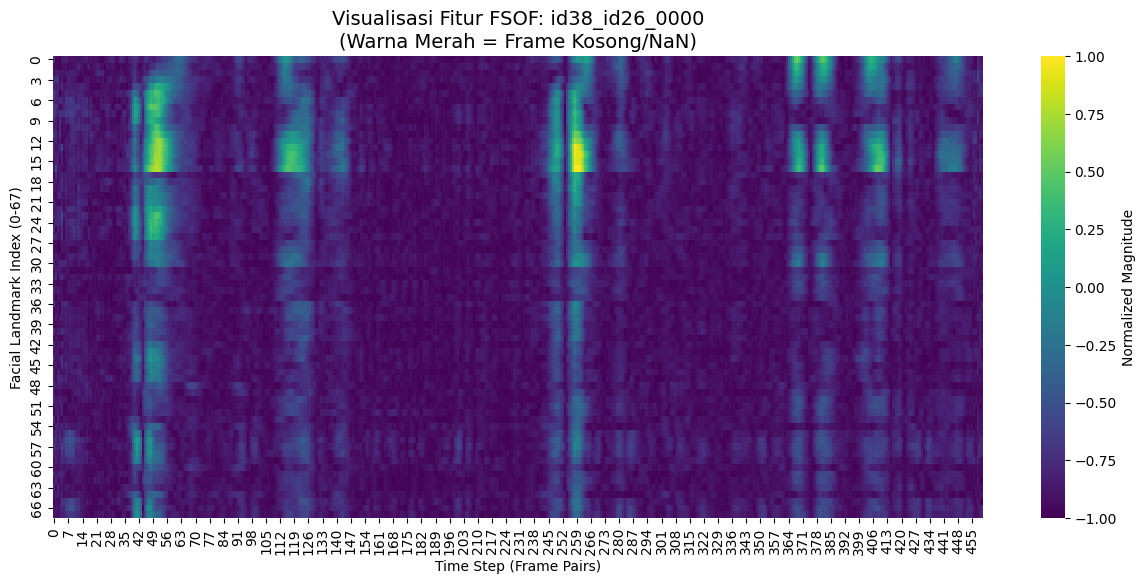


📈 STATISTIK DATA VALID:
Min: -1.0000
Max: 1.0000
Mean: -0.1054


In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti dengan path output folder fitur Anda
FEATURE_DIR = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final/stride_5"

def visualize_batch_shape_and_values(target_batch_file=None):
    # 1. Load File
    if target_batch_file is None:
        files = [f for f in os.listdir(FEATURE_DIR) if f.endswith('.npy')]
        if not files:
            print("❌ Tidak ada file .npy di folder output.")
            return
        target_batch_file = random.choice(files)

    path = os.path.join(FEATURE_DIR, target_batch_file)
    print(f"📂 MEMERIKSA FILE: {target_batch_file}")
    print("=" * 60)

    try:
        data = np.load(path, allow_pickle=True).item()
    except Exception as e:
        print(f"Error loading: {e}")
        return

    # 2. Batch Level Info
    video_ids = list(data.keys())
    print(f"📊 Total Video dalam Batch: {len(video_ids)}")

    # 3. Video Level Info (Ambil sampel random)
    vid_id = random.choice(video_ids)
    vid_data = data[vid_id]
    features = vid_data['features'] # Shape: (68, Time, 7)

    print(f"\n🎥 VIDEO ID: {vid_id}")
    print(f"Label: {vid_data['label']}")
    print(f"Valid Data Ratio: {vid_data.get('valid_ratio', 'N/A'):.2%}")
    print(f"SHAPE VIDEO (Landmark, Time, Channel): {features.shape}")

    # 4. Frame Level Info (Ambil sampel waktu)
    # Kita ambil frame ke-X
    time_steps = features.shape[1]
    if time_steps > 0:
        t_idx = random.randint(0, time_steps - 1)

        frame_slice = features[:, t_idx, :] # Shape: (68, 7)
        print(f"\n🖼️ FRAME SAMPLE (Time index: {t_idx})")
        print(f"SHAPE FRAME (Landmark, Channel): {frame_slice.shape}")

        # Cek apakah frame ini NaN (Invalid/Low Confidence)
        if np.isnan(frame_slice).all():
            print("⚠️ Frame ini berisi NaN (Low Confidence / Wajah Kosong).")
        else:
            print("✅ Frame Valid (Berisi nilai numerik).")
            # Tampilkan 3 landmark pertama sebagai contoh
            print("Contoh Nilai (3 Landmark pertama):")
            print(frame_slice[:3, :])

    # 5. VISUALISASI HEATMAP
    # Kita akan memvisualisasikan Channel 'Magnitude' (Channel index 2)
    # Sumbu Y: Landmark (0-67), Sumbu X: Waktu
    if time_steps > 0:
        magnitude_map = features[:, :, 2] # Ambil channel Magnitude

        plt.figure(figsize=(15, 6))

        # Gunakan warna abu-abu/merah untuk NaN (data kosong)
        current_cmap = plt.cm.viridis
        current_cmap.set_bad(color='red') # NaN akan berwarna MERAH

        sns.heatmap(magnitude_map, cmap=current_cmap, cbar=True, cbar_kws={'label': 'Normalized Magnitude'})

        plt.title(f"Visualisasi Fitur FSOF: {vid_id}\n(Warna Merah = Frame Kosong/NaN)", fontsize=14)
        plt.xlabel("Time Step (Frame Pairs)")
        plt.ylabel("Facial Landmark Index (0-67)")
        plt.show()

    # 6. PRINT RAW VALUES SAMPLE (Untuk memastikan range -1 s/d 1)
    # Ambil data valid saja untuk statistik
    valid_features = features[~np.isnan(features)]
    if len(valid_features) > 0:
        print("\n📈 STATISTIK DATA VALID:")
        print(f"Min: {np.min(valid_features):.4f}")
        print(f"Max: {np.max(valid_features):.4f}")
        print(f"Mean: {np.mean(valid_features):.4f}")
    else:
        print("\n⚠️ Video ini kosong sepenuhnya (semua NaN).")

# --- JALANKAN ---
visualize_batch_shape_and_values()

## Desain Eksperimen

In [ ]:
import os
import json
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ==========================================
# 1. KONFIGURASI GLOBAL
# ==========================================
BASE_PATH = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final"
SPLIT_JSON_PATH = os.path.join(BASE_PATH, "dataset_split.json")

# Parameter Model & Training
INPUT_HEIGHT = 68
INPUT_WIDTH = 68
NUM_CLASSES = 1
BATCH_SIZE = 64
EPOCHS = 50
LEARNING_RATE = 1e-4

print(f"TensorFlow Version: {tf.__version__}")
print(f"Num GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow Version: 2.19.0
Num GPUs Available: 1


#### Split Dataset

In [ ]:
# import os
# import numpy as np
# import json
# from sklearn.model_selection import train_test_split
# from tqdm.notebook import tqdm

# # --- KONFIGURASI ---
# # Pastikan path ini SAMA PERSIS dengan BAB 1 kode Training Anda
# BASE_PATH = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final"
# OUTPUT_JSON_PATH = os.path.join(BASE_PATH, "dataset_split.json")

# def generate_split_index(feature_dir_base):
#     # Kita menggunakan Stride 1 sebagai referensi pembagian
#     # (Video ID di Stride 1, 3, dan 5 adalah sama, jadi cukup scan satu folder)
#     target_dir = os.path.join(feature_dir_base, "stride_1")

#     print(f"📂 Scanning data dari: {target_dir}")

#     if not os.path.exists(target_dir):
#         print(f"❌ ERROR: Folder {target_dir} tidak ditemukan.")
#         print("   Jalankan proses 'Feature Extraction' untuk Stride 1 terlebih dahulu!")
#         return

#     # 1. KUMPULKAN METADATA
#     all_metadata = []
#     npy_files = sorted([f for f in os.listdir(target_dir) if f.endswith('.npy')])

#     if len(npy_files) == 0:
#         print("❌ ERROR: Tidak ada file .npy di folder tersebut.")
#         return

#     for filename in tqdm(npy_files, desc="Indexing Files"):
#         file_path = os.path.join(target_dir, filename)
#         try:
#             # Load dictionary
#             data = np.load(file_path, allow_pickle=True).item()

#             for vid_id, content in data.items():
#                 all_metadata.append({
#                     "video_id": vid_id,
#                     "label": content['label'],
#                     "file_source": filename  # Nama file batch (misal: features_batch_001.npy)
#                 })
#         except Exception as e:
#             print(f"⚠️ Gagal membaca {filename}: {e}")

#     print(f"✅ Total Video ditemukan: {len(all_metadata)}")

#     # 2. LAKUKAN SPLITTING (70% Train, 15% Val, 15% Test)
#     # Ambil label untuk stratifikasi (agar seimbang Real/Fake)
#     metadata_labels = [m['label'] for m in all_metadata]

#     # Split 1: Pisahkan Train (70%) vs Temp (30%)
#     train_data, temp_data, train_labels, temp_labels = train_test_split(
#         all_metadata, metadata_labels,
#         test_size=0.3,
#         stratify=metadata_labels,
#         random_state=42
#     )

#     # Split 2: Pisahkan Temp menjadi Val (15%) dan Test (15%)
#     # Karena Temp adalah 30% dari total, maka kita bagi 2 (0.5)
#     val_data, test_data = train_test_split(
#         temp_data,
#         test_size=0.5,
#         stratify=temp_labels,
#         random_state=42
#     )

#     print("-" * 40)
#     print(f"📊 HASIL SPLIT:")
#     print(f"   Train : {len(train_data)} video")
#     print(f"   Val   : {len(val_data)} video")
#     print(f"   Test  : {len(test_data)} video")
#     print("-" * 40)

#     # 3. SIMPAN KE JSON
#     split_result = {
#         "train": train_data,
#         "val": val_data,
#         "test": test_data
#     }

#     with open(OUTPUT_JSON_PATH, 'w') as f:
#         json.dump(split_result, f, indent=4)

#     print(f"💾 File Split BERHASIL disimpan di:\n   {OUTPUT_JSON_PATH}")

# # --- EKSEKUSI ---
# generate_split_index(BASE_PATH)

In [ ]:
import json
import os
import pandas as pd

# Path ke file JSON (Pastikan path ini benar)
BASE_PATH = "/content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final"
JSON_PATH = os.path.join(BASE_PATH, "dataset_split.json")

def verify_label_distribution():
    if not os.path.exists(JSON_PATH):
        print("❌ File dataset_split.json tidak ditemukan!")
        return

    with open(JSON_PATH, 'r') as f:
        split_data = json.load(f)

    # Container untuk laporan
    report = []

    for split_name in ['train', 'val', 'test']:
        data_list = split_data[split_name]

        # Hitung Label
        labels = [item['label'] for item in data_list]
        total = len(labels)
        real_count = labels.count(0)
        fake_count = labels.count(1)

        # Hitung Persentase
        real_pct = (real_count / total) * 100 if total > 0 else 0
        fake_pct = (fake_count / total) * 100 if total > 0 else 0

        report.append({
            "Set": split_name.upper(),
            "Total Video": total,
            "Real (0)": f"{real_count} ({real_pct:.1f}%)",
            "Fake (1)": f"{fake_count} ({fake_pct:.1f}%)"
        })

    # Tampilkan sebagai Tabel
    df = pd.DataFrame(report)
    print("📊 DISTRIBUSI LABEL (REAL vs FAKE)")
    print("=" * 60)
    print(df.to_string(index=False))
    print("=" * 60)

    # Cek Konsistensi
    # Jika persentase Real/Fake mirip di semua set, berarti Stratify BERHASIL.
    print("\n✅ Analisis:")
    print("Perhatikan kolom persentase (%). Jika nilainya mirip antar set")
    print("(misal: Train 15% Real, Val 15% Real, Test 15% Real),")
    print("maka pembagian data sudah SEIMBANG (Stratified).")

# Jalankan
verify_label_distribution()

📊 DISTRIBUSI LABEL (REAL vs FAKE)
  Set  Total Video   Real (0)     Fake (1)
TRAIN         4316 390 (9.0%) 3926 (91.0%)
  VAL          925  83 (9.0%)  842 (91.0%)
 TEST          925  84 (9.1%)  841 (90.9%)

✅ Analisis:
Perhatikan kolom persentase (%). Jika nilainya mirip antar set
(misal: Train 15% Real, Val 15% Real, Test 15% Real),
maka pembagian data sudah SEIMBANG (Stratified).


#### Data Loader

In [ ]:
class FSOFDataGenerator(keras.utils.Sequence):
    """
    Custom Data Generator dengan Zero Padding untuk Frame Rusak/NaN.
    """
    def __init__(self, list_ids, feature_dir, batch_size=32,
                 dim=(68, 68), n_channels=7, channel_indices=None,
                 shuffle=True, stride_folder="stride_1"):

        # 1. Fix Warning Keras
        super().__init__()

        self.list_ids = list_ids
        self.feature_dir = os.path.join(feature_dir, stride_folder)
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.channel_indices = channel_indices
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.list_ids) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_ids_temp = [self.list_ids[k] for k in indexes]
        X, y = self.__data_generation(list_ids_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_ids_temp):
        # Inisialisasi Batch (Default kosong)
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        for i, meta in enumerate(list_ids_temp):
            vid_id = meta['video_id']
            label = meta['label']
            filename = meta['file_source']

            try:
                full_path = os.path.join(self.feature_dir, filename)
                batch_dict = np.load(full_path, allow_pickle=True).item()
                raw_features = batch_dict[vid_id]['features']

                # --- A. Temporal Cropping (Random Window 68 Frame) ---
                n_landmarks, n_frames, n_feats = raw_features.shape
                target_width = self.dim[1] # 68

                if n_frames > target_width:
                    # Ambil potongan acak
                    start_idx = np.random.randint(0, n_frames - target_width)
                    cropped_feat = raw_features[:, start_idx : start_idx + target_width, :]
                else:
                    # Padding jika video kependekan (sangat jarang)
                    pad_width = target_width - n_frames
                    cropped_feat = np.pad(raw_features, ((0,0), (0, pad_width), (0,0)), mode='constant')

                # --- B. Channel Slicing ---
                if self.channel_indices is not None:
                    final_feat = cropped_feat[:, :, self.channel_indices]
                else:
                    final_feat = cropped_feat

                # --- C. ZERO PADDING (FIX CRITICAL ERROR) ---
                final_feat = np.nan_to_num(final_feat, nan=0.0)
                # --------------------------------------------

                X[i,] = final_feat
                y[i] = label

            except Exception as e:
                X[i,] = np.zeros((self.dim[0], self.dim[1], self.n_channels))
                y[i] = 0 # Label default 0

        return X, y

In [ ]:
from sklearn.utils import class_weight

def get_class_weights(split_json_path):
    """
    Menghitung Class Weight agar model tidak bias ke kelas mayoritas.
    Rumus: n_samples / (n_classes * n_samples_per_class)
    """
    with open(split_json_path, 'r') as f:
        data = json.load(f)

    # Kita hanya butuh data training untuk hitung bobot
    train_labels = [item['label'] for item in data['train']]

    # Hitung bobot menggunakan sklearn
    # Classes: [0, 1] (Real, Fake)
    class_weights_vals = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_labels),
        y=train_labels
    )

    # Ubah ke format dictionary yang diminta Keras
    # Contoh output: {0: 5.2, 1: 0.55} -> Error di kelas 0 (Real) dihukum 5x lebih berat
    class_weight_dict = dict(enumerate(class_weights_vals))

    print(f"   Real (0): {class_weight_dict[0]:.4f}")
    print(f"   Fake (1): {class_weight_dict[1]:.4f}")

    return class_weight_dict

#### Modeling

In [ ]:
def build_fsof_xception(input_shape=(68, 68, 7), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # --- ENTRY FLOW (Modified for 68x68 input) ---
    # Layer konvolusi awal disesuaikan agar tidak mereduksi dimensi terlalu agresif
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), use_bias=False, padding='same', name='block1_conv1')(inputs)
    x = layers.BatchNormalization(name='block1_conv1_bn')(x)
    x = layers.Activation('relu', name='block1_conv1_act')(x)

    x = layers.Conv2D(64, (3, 3), use_bias=False, padding='same', name='block1_conv2')(x)
    x = layers.BatchNormalization(name='block1_conv2_bn')(x)
    x = layers.Activation('relu', name='block1_conv2_act')(x)

    # Residual Block sederhana (menggantikan Xception blocks yang kompleks/berat)
    # Kita buat versi "Mini-Xception" agar tidak overfitting pada data matriks

    # Block 2
    residual = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = layers.BatchNormalization()(residual)

    x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = layers.BatchNormalization(name='block2_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block2_sepconv2_act')(x)
    x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = layers.BatchNormalization(name='block2_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    # Block 3
    residual = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = layers.BatchNormalization()(residual)

    x = layers.Activation('relu', name='block3_sepconv1_act')(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = layers.BatchNormalization(name='block3_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block3_sepconv2_act')(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = layers.BatchNormalization(name='block3_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    # --- EXIT FLOW ---
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)

    # Classifier
    x = layers.Dropout(0.5)(x) # Dropout untuk mencegah overfitting
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='sigmoid', name='predictions')(x)

    model = models.Model(inputs, outputs, name='fsof_xception')
    return model

# Test Build
# model = build_fsof_xception(input_shape=(68, 68, 7))
# model.summary()

#### Training Blocks

##### Training

In [ ]:
# ==========================================
# 3. TRAINING ENGINE
# ==========================================
def run_experiment(exp_id, exp_name, channels_idx, stride_folder="stride_1"):
    print(f"\n{'='*60}")
    print(f"{exp_id} - {exp_name}")
    print(f"   Channels: {channels_idx}")
    print(f"   Stride  : {stride_folder}")
    print(f"{'='*60}")

    # --- SETUP PATHS ---
    # 1. Folder Output di Google Drive
    dir_models = os.path.join(BASE_PATH, "results", "models")
    dir_logs_drive = os.path.join(BASE_PATH, "results", "logs")
    dir_plots  = os.path.join(BASE_PATH, "results", "plots")

    os.makedirs(dir_models, exist_ok=True)
    os.makedirs(dir_logs_drive, exist_ok=True)
    os.makedirs(dir_plots, exist_ok=True)

    # 2. Folder Sementara di Local Colab (Agar Write Cepat)
    dir_logs_local = "/content/temp_logs"
    os.makedirs(dir_logs_local, exist_ok=True)

    # --- LOAD DATA ---
    with open(SPLIT_JSON_PATH, 'r') as f:
        split_data = json.load(f)
    my_class_weights = get_class_weights(SPLIT_JSON_PATH)

    n_channels = len(channels_idx)
    train_gen = FSOFDataGenerator(
        split_data['train'], BASE_PATH,
        batch_size=BATCH_SIZE, n_channels=n_channels,
        channel_indices=channels_idx, stride_folder=stride_folder
    )
    val_gen = FSOFDataGenerator(
        split_data['val'], BASE_PATH,
        batch_size=BATCH_SIZE, n_channels=n_channels,
        channel_indices=channels_idx, stride_folder=stride_folder,
        shuffle=False
    )

    # --- BUILD MODEL ---
    model = build_fsof_xception(input_shape=(68, 68, n_channels))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    )

    # --- KONFIGURASI FILE OUTPUT ---

    # A. Model Checkpoint (Disimpan di Drive)
    # Kita monitor val_loss (MIN) karena dataset imbalanced
    best_model_path = os.path.join(dir_models, f"best_model_{exp_id}_epoch-{{epoch:02d}}_loss-{{val_loss:.4f}}.keras")

    # B. CSV Logging (Lokal -> Drive)
    csv_log_local = os.path.join(dir_logs_local, f"training_log_{exp_id}.csv")
    csv_log_drive = os.path.join(dir_logs_drive, f"training_log_{exp_id}.csv")

    # [LOGIC RESUME LOG]
    # Jika log sudah ada di Drive (misal habis putus), copy dulu ke local
    # agar CSVLogger bisa "append" (melanjutkan) isinya, bukan menimpa.
    if os.path.exists(csv_log_drive):
        shutil.copy(csv_log_drive, csv_log_local)

    # C. Backup & Restore (Untuk Resume Otomatis jika Crash)
    backup_dir = os.path.join(BASE_PATH, "training_backups", exp_id)
    os.makedirs(backup_dir, exist_ok=True)

    # --- TRAINING EXECUTION ---
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[
            # 1. BackupAndRestore WAJIB paling atas.
            #    Ini menyimpan state training (epoch, weights) setiap selesai epoch.
            #    Jika error, cukup run ulang cell ini, dia otomatis lanjut.
            callbacks.BackupAndRestore(backup_dir=backup_dir),

            # 2. CSVLogger menulis ke LOCAL disk (Cepat & Stabil)
            callbacks.CSVLogger(csv_log_local, separator=',', append=True),

            # 3. Custom Sync: Copy file local tadi ke Drive
            DriveLogSync(local_path=csv_log_local, drive_path=csv_log_drive),

            # 4. Save Model Terbaik (Berdasarkan Val Loss terendah)
            callbacks.ModelCheckpoint(
                best_model_path,
                monitor='val_loss',
                mode='min',
                save_best_only=True,
                verbose=1
            ),

            # 5. Utilities
            callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
        ],
        class_weight=my_class_weights,
        verbose=1
    )

    # --- FINALIZATION ---
    # Pastikan log terakhir ter-copy
    if os.path.exists(csv_log_local):
        shutil.copy(csv_log_local, csv_log_drive)

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{exp_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{exp_name} Loss')
    plt.legend()

    plot_path = os.path.join(dir_plots, f"plot_{exp_id}.png")
    plt.savefig(plot_path)
    plt.show()

    return history

In [ ]:
# ==========================================
# 4. SKENARIO EKSPERIMEN
# ==========================================
SCENARIOS = [
    # KELOMPOK 1: ABLATION STUDY
    # {"id": "EXP-01", "name": "Feature_VectorsOnly", "channels": [0, 1], "stride": "stride_1"}
    # {"id": "EXP-02", "name": "Feature_WithMag", "channels": [0, 1, 2], "stride": "stride_1"},
    # {"id": "EXP-03", "name": "Feature_WithAngle", "channels": [0, 1, 2, 3, 4], "stride": "stride_1"},
    # {"id": "EXP-04", "name": "Feature_Full_Acceleration", "channels": [0, 1, 2, 3, 4, 5, 6], "stride": "stride_1"},

    # # KELOMPOK 2: STRIDE ANALYSIS
    # {"id": "EXP-05", "name": "Stride_3_Full", "channels": [0, 1, 2, 3, 4, 5, 6], "stride": "stride_3"},
    # {"id": "EXP-06", "name": "Stride_5_Full", "channels": [0, 1, 2, 3, 4, 5, 6], "stride": "stride_5"}
]

# --- EXECUTE ---
for exp in SCENARIOS:
    stride_path = os.path.join(BASE_PATH, exp['stride'])
    if os.path.exists(stride_path):
        run_experiment(exp['id'], exp['name'], exp['channels'], exp['stride'])
    else:
        print(f"Skip {exp['id']}, folder {exp['stride']} belum ada.")


EXP-01 - Feature_VectorsOnly
   Channels: [0, 1]
   Stride  : stride_1
   Real (0): 5.5333
   Fake (1): 0.5497
Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4713 - loss: 0.8825 - precision: 0.9077 - recall: 0.4634
Epoch 1: val_loss improved from inf to 0.73377, saving model to /content/drive/MyDrive/TUGAS AKHIR_I Gusti Bagus Sutha Arianata Putra/Assets/feature_maps_final/results/models/best_model_EXP-01_epoch-01_loss-0.7338.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 376s 5s/step - accuracy: 0.4718 - loss: 0.8815 - precision: 0.9078 - recall: 0.4640 - val_accuracy: 0.0893 - val_loss: 0.7338 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
22/67 ━━━━━━━━━━━━━━━━━━━━ 3:12 4s/step - accuracy: 0.5445 - loss: 0.8511 - precision: 0.9113 - recall: 0.5561

#### Testing